In [27]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn import metrics
from sklearn.cluster import KMeans

## Functions

In [2]:
# %load plot_clustered_ts.py
def plot_clustered_ts(timeSeries,clusters, anim, plot = True):
    %matplotlib inline
    from scipy.cluster.hierarchy import fcluster, linkage
    import math
    import time

    results = clusters
    #print(results)
    # check the results
    s = pd.Series(results)
    #print("s:",s)
    clusters = s.unique()
    #print("clusters", clusters)
    if anim == True:
        %matplotlib

    fig = plt.figure(1, figsize = (15,10))
    for i, c in enumerate(clusters):
        #print("i", i)
        #print("c", c)

        cluster_indeces = s[s==c].index
        #print("cluster_indeces", cluster_indeces)
        if plot:
            with plt.style.context(('bmh')):
                x = math.ceil(k/2)
                ax = fig.add_subplot(x,2,i+1)
                if anim == True:
                    axes = fig.add_subplot(x,2,i+1)

                    for cluster_index in cluster_indeces:
                        axes = plt.gca()
                        limmax = 3
                        limmin = -3
                        axes.set_ylim(limmin, limmax)
                        #print("cluster_index", cluster_index)
                        #print(timeSeries.T.loc[:,cluster_index])
                        plt.plot(timeSeries.T.loc[:,cluster_index], marker = ".",label = cluster_index)
                        plt.draw()
                        plt.pause(0.1)
                        
                        #plt.legend(frameon=False, loc='lower right', ncol=2)

                else:
                    with plt.style.context(('bmh')):
                        x = math.ceil(k/2)
                        ax = fig.add_subplot(x,2,i+1)


                        %matplotlib inline
                        for cluster_index in range(len(cluster_indeces)):
                                
                            axes = plt.gca()
                            limmax = 3
                            limmin = -3
                            axes.set_ylim(limmin, limmax)
                            ax.plot(timeSeries.loc[:,cluster_index], marker = ".",label = cluster_index)



        else:
            print("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
    return results

In [3]:
# %load cycle_transform.py
def cycle_transform(df, value, save = True):

    value_ = df[["cycle_day", value, "cycle_index"]]
    #print(sorted(value_.cycle_index.unique()))

    value_zero = value_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_).fillna(0)
    #print("value_zero:",value_zero)
    value_nan = value_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_)

    if save == True:
        value_zero.to_csv("Data/"+value+"_zero.csv")
        value_nan.to_csv("Data/"+value+"_nan.csv")
    return value_zero, value_nan

In [4]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column


Missing values per column:


NameError: name 'df' is not defined

## Data

In [18]:
#missing days interpolated
md = pd.read_csv("Data/missingdays_interpolated.csv")
#complete cycles
cc = pd.read_csv("Data/data_clean2.csv")


cc = cc.drop(["Unnamed: 0", "level_0", "br_stan","hr_stan","st_stan","index","date"], axis =1)
md = md.drop(["date.1","date"],axis =1)
df_regLen = cc
groupby_cycles = df_regLen.groupby(["cycle_index","user","cycle_number"]).mean()
groupby_cycles
user_cycle_df = pd.DataFrame(groupby_cycles.reset_index()[["cycle_index", "user", "cycle_number", "cycle_length"]])

user_cycle_df["cycle_length"] = user_cycle_df["cycle_length"].astype(int)
user_cycle_df

df_ = df_regLen
hr_norm_zero, hr_norm_nan = cycle_transform(df_, "hr_norm", False)

hr_zero, hr_nan = cycle_transform(df_, "hr", False)

In [19]:
df = pd.read_csv("Data/data_clean2.csv") # = cc 
df

Unnamed: 0  level_0  index   user  first_date   last_date  cycle_number  \
0              0       56     56    360  2016-09-08  2016-10-11             1   
1              1       57     57    360  2016-09-08  2016-10-11             1   
2              2       58     58    360  2016-09-08  2016-10-11             1   
3              3       59     59    360  2016-09-08  2016-10-11             1   
4              4       60     60    360  2016-09-08  2016-10-11             1   
5              5       61     61    360  2016-09-08  2016-10-11             1   
6              6       62     62    360  2016-09-08  2016-10-11             1   
7              7       63     63    360  2016-09-08  2016-10-11             1   
8              8       64     64    360  2016-09-08  2016-10-11             1   
9              9       65     65    360  2016-09-08  2016-10-11             1   
10            10       66     66    360  2016-09-08  2016-10-11             1   
11            11       67     67    360  2016-09-08  2016-10-11             1   
12            12       68     68    360  2016-09-08  2016-10-11             1   
13            13       69     69    360  2016-09-08  2016-10-11             1   
14            14       70     70    360  2016-09-08  2016-10-11             1   
15            15       71     71    360  2016-09-08  2016-10-11             1   
16            16       72     72    360  2016-09-08  2016-10-11             1   
17            17       73     73    360  2016-09-08  2016-10-11             1   
18            18       74     74    360  2016-09-08  2016-10-11             1   
19            19       75     75    360  2016-09-08  2016-10-11             1   
20            20       76     76    360  2016-09-08  2016-10-11             1   
21            21       77     77    360  2016-09-08  2016-10-11             1   
22            22       78     78    360  2016-09-08  2016-10-11             1   
23            23       79     79    360  2016-09-08  2016-10-11             1   
24            24       80     80    360  2016-09-08  2016-10-11             1   
25            25       81     81    360  2016-09-08  2016-10-11             1   
26            26       82     82    360  2016-09-08  2016-10-11             1   
27            27       83     83    360  2016-09-08  2016-10-11             1   
28            28       84     84    360  2016-09-08  2016-10-11             1   
29            29       85     85    360  2016-09-08  2016-10-11             1   
...          ...      ...    ...    ...         ...         ...           ...   
4781        4781    20115  20131  19278  2017-10-16  2017-11-16             1   
4782        4782    20116  20132  19278  2017-10-16  2017-11-16             1   
4783        4783    20117  20133  19278  2017-10-16  2017-11-16             1   
4784        4784    20118  20134  19278  2017-10-16  2017-11-16             1   
4785        4785    20119  20135  19278  2017-10-16  2017-11-16             1   
4786        4786    20120  20136  19278  2017-10-16  2017-11-16             1   
4787        4787    20121  20137  19278  2017-10-16  2017-11-16             1   
4788        4788    20122  20138  19278  2017-10-16  2017-11-16             1   
4789        4789    20123  20139  19278  2017-10-16  2017-11-16             1   
4790        4790    20124  20140  19278  2017-10-16  2017-11-16             1   
4791        4791    20125  20141  19278  2017-10-16  2017-11-16             1   
4792        4792    20126  20142  19278  2017-10-16  2017-11-16             1   
4793        4793    20127  20143  19278  2017-10-16  2017-11-16             1   
4794        4794    20128  20144  19278  2017-10-16  2017-11-16             1   
4795        4795    20129  20145  19278  2017-10-16  2017-11-16             1   
4796        4796    20130  20146  19278  2017-10-16  2017-11-16             1   
4797        4797    20131  20147  19278  2017-10-16  2017-11-16             1   
4798        4798    20132  20148  192

In [20]:
features = df[df.cycle_length == 29]

features = features[["cycle_index","cycle_day", "hr_norm"]]
len(features)

754

In [21]:
### perform extraction, imputing and filtering at the same time
from tsfresh import extract_features

features_ = extract_features(features, column_id='cycle_index', column_sort='cycle_day')

Feature Extraction: 100%|██████████| 13/13 [00:00<00:00, 20.85it/s]


In [23]:
features_

#Applying per column:
print("Missing values per column:")
missing = features_.apply(num_missing, axis=0)#axis=0 defines that function is to be applied on each column
features = missing.where(missing == 0)
features

Missing values per column:


variable
hr_norm__abs_energy                                                        0.0
hr_norm__absolute_sum_of_changes                                           0.0
hr_norm__agg_autocorrelation__f_agg_"mean"                                 0.0
hr_norm__agg_autocorrelation__f_agg_"median"                               0.0
hr_norm__agg_autocorrelation__f_agg_"var"                                  0.0
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"     0.0
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"        0.0
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"         0.0
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"        0.0
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"     NaN
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"        NaN
hr_norm__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"         NaN
hr_norm__agg_linear_trend__f_agg_"max"__chu

In [24]:
features = features_.dropna(axis=1, how='any')
print(features_.shape)
features.shape
features_new = features.where(features != 0).dropna(axis = 1, how = "any")
print(features_new.shape)
features_finite = features_new.replace([np.inf, -np.inf], np.nan)
print(features_finite.shape)



features_finite2 = features_new.replace([np.inf, -np.inf], np.nan).dropna(axis = 1, how = "any")
print(features_finite2.shape)
features_finite2

(26, 794)
(26, 342)
(26, 342)
(26, 342)


variable  hr_norm__abs_energy  hr_norm__absolute_sum_of_changes  \
id                                                                
22                       28.0                          7.632996   
24                       28.0                          7.081254   
27                       28.0                          7.372813   
52                       28.0                          7.503425   
57                       28.0                          7.161557   
81                       28.0                          7.045796   
126                      28.0                         10.390120   
175                      28.0                          8.450265   
210                      28.0                          8.327300   
211                      28.0                         10.554576   
214                      28.0                          6.862013   
230                      28.0                         12.019235   
236                      28.0                          8.011062   
253                      28.0                          7.256285   
277                      28.0                         10.451972   
482                      28.0                          9.045988   
490                      28.0                          6.279918   
542                      28.0                          6.713613   
625                      28.0                          8.240466   
633                      28.0                          8.177785   
651                      28.0                          9.684088   
692                      28.0                          8.239855   
719                      28.0                          8.993376   
725                      28.0                         15.295725   
780                      28.0                         13.223177   
782                      28.0                         16.818525   

variable  hr_norm__agg_autocorrelation__f_agg_"mean"  \
id                                                     
22                                          0.030455   
24                                         -0.441414   
27                                          0.096878   
52                                         -0.152829   
57                                         -0.043837   
81                                         -0.067067   
126                                        -0.299377   
175                                        -0.107081   
210                                        -0.030902   
211                                        -0.130061   
214                                        -0.154678   
230                                        -0.531782   
236                                        -0.134601   
253                                        -0.259310   
277                                        -0.137009   
482                                        -0.029491   
490                                        -0.061570   
542                                        -0.217106   
625                                        -0.035842   
633                                        -0.328657   
651                                         0.067190   
692                                        -0.043804   
719                                         0.109295   
725                                        -0.077511   
780                                        -0.085609   
782                                        -0.002392   

variable  hr_norm__agg_autocorrelation__f_agg_"median"  \
id                                                       
22                                           -0.101339   
24                                           -0.426018   
27                                            0.078109   
52                                           -0.216498   
57                                            0.019098   
81                                           -0.038689   
126                                          -0.251701   
175                             

## k-means of tsfresh features

In [28]:
cluster_data = features_finite2.iloc[:, 1:].values

[[  1.11319413e+01  -7.77164630e-03  -1.24699714e-02 ...,  -7.21796604e-02
   -1.78974579e-02   9.65517241e-01]
 [  9.34007873e+00  -1.70151431e-01  -1.30193956e-01 ...,   2.21448885e-01
    2.13186664e-01   9.65517241e-01]
 [  7.25628500e+00  -2.59309872e-01  -4.12583095e-01 ...,   6.12248466e-02
    3.05180439e-01   9.65517241e-01]
 [  8.90728274e+00  -9.57063578e-02  -1.50053468e-01 ...,   3.27731203e-03
    4.82364000e-02   9.65517241e-01]
 [  6.68058612e+00  -2.51491810e-01  -2.77649864e-01 ...,   3.11572408e-01
    4.05408884e-01   9.65517241e-01]
 [  8.32730015e+00  -3.09017914e-02  -1.76503709e-02 ...,  -1.92750856e-01
   -4.16398560e-01   9.65517241e-01]]
[1 4 3 3 1 3 1 3 5 0 3 1 3 2 3 3 4 1 3 3 0 1 0 0 1 3]


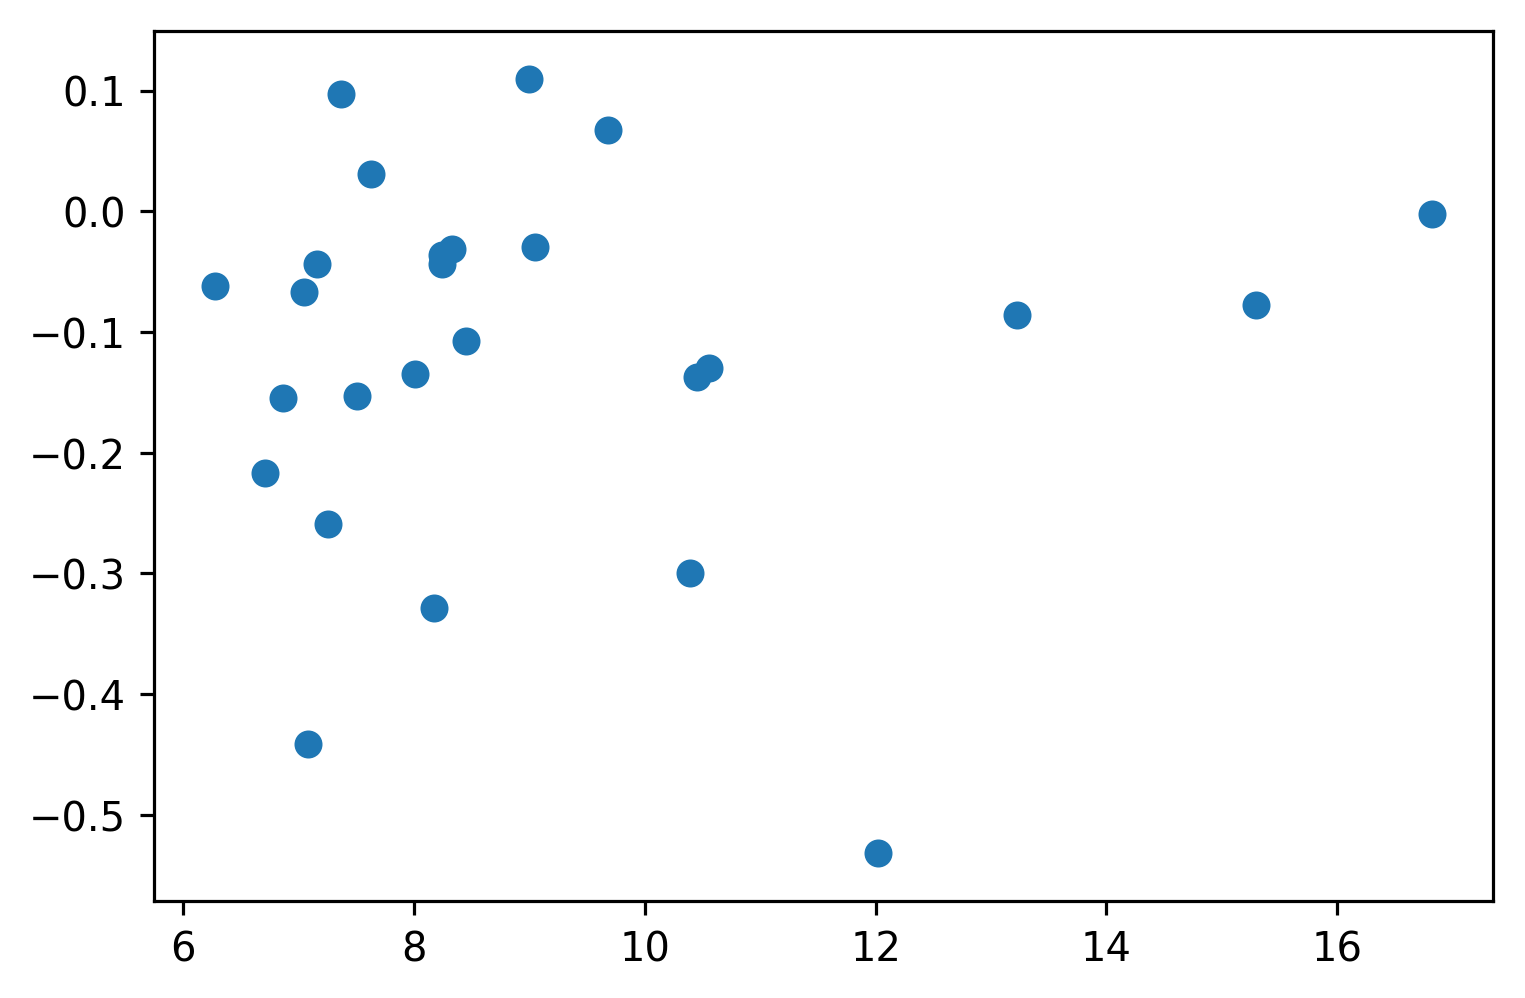

In [33]:
k = 6

kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)

kmeans.fit(cluster_data)

plt.scatter(cluster_data[:,0],cluster_data[:,1])

centroids = kmeans.cluster_centers_
print(centroids)
labels = kmeans.labels_
print(labels)

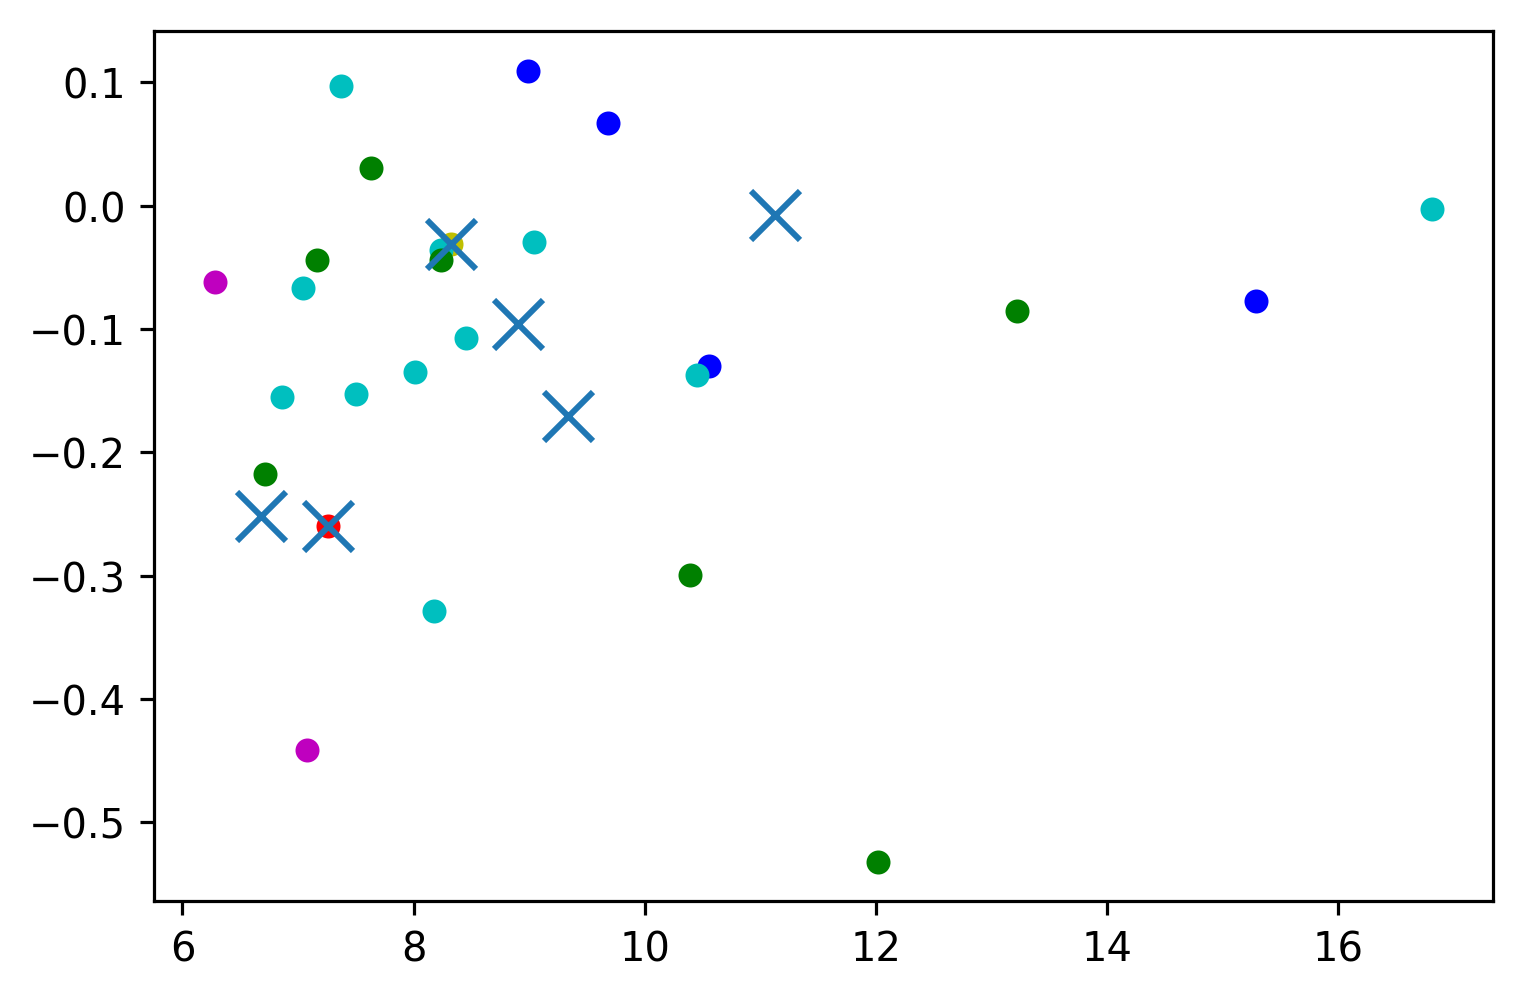

In [34]:
colors = ['b.', 'g.', 'r.', 'c.', 'm.', 'y.', 'k.', 'w.']
X = cluster_data
for i in range(len(X)):
    
    #print("coordinate:",X[i][0], "label:", labels[i])
    #print("X", X[i][0])
    #print("label", colors[labels[i]])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

In [35]:
cluster_indeces = pd.concat([pd.DataFrame(labels), pd.DataFrame(features_finite2.index)], axis = 1)
cluster_indeces["cluster"] = cluster_indeces[0]
cluster_indeces = cluster_indeces.drop(0, axis = 1).set_index("id")
cluster_indeces.head()

cluster
id         
22        1
24        4
27        3
52        3
57        1

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


id
22     1
24     4
27     3
52     3
57     1
81     3
126    1
175    3
210    5
211    0
214    3
230    1
236    3
253    2
277    3
482    3
490    4
542    1
625    3
633    3
651    0
692    1
719    0
725    0
780    1
782    3
Name: cluster, dtype: int32

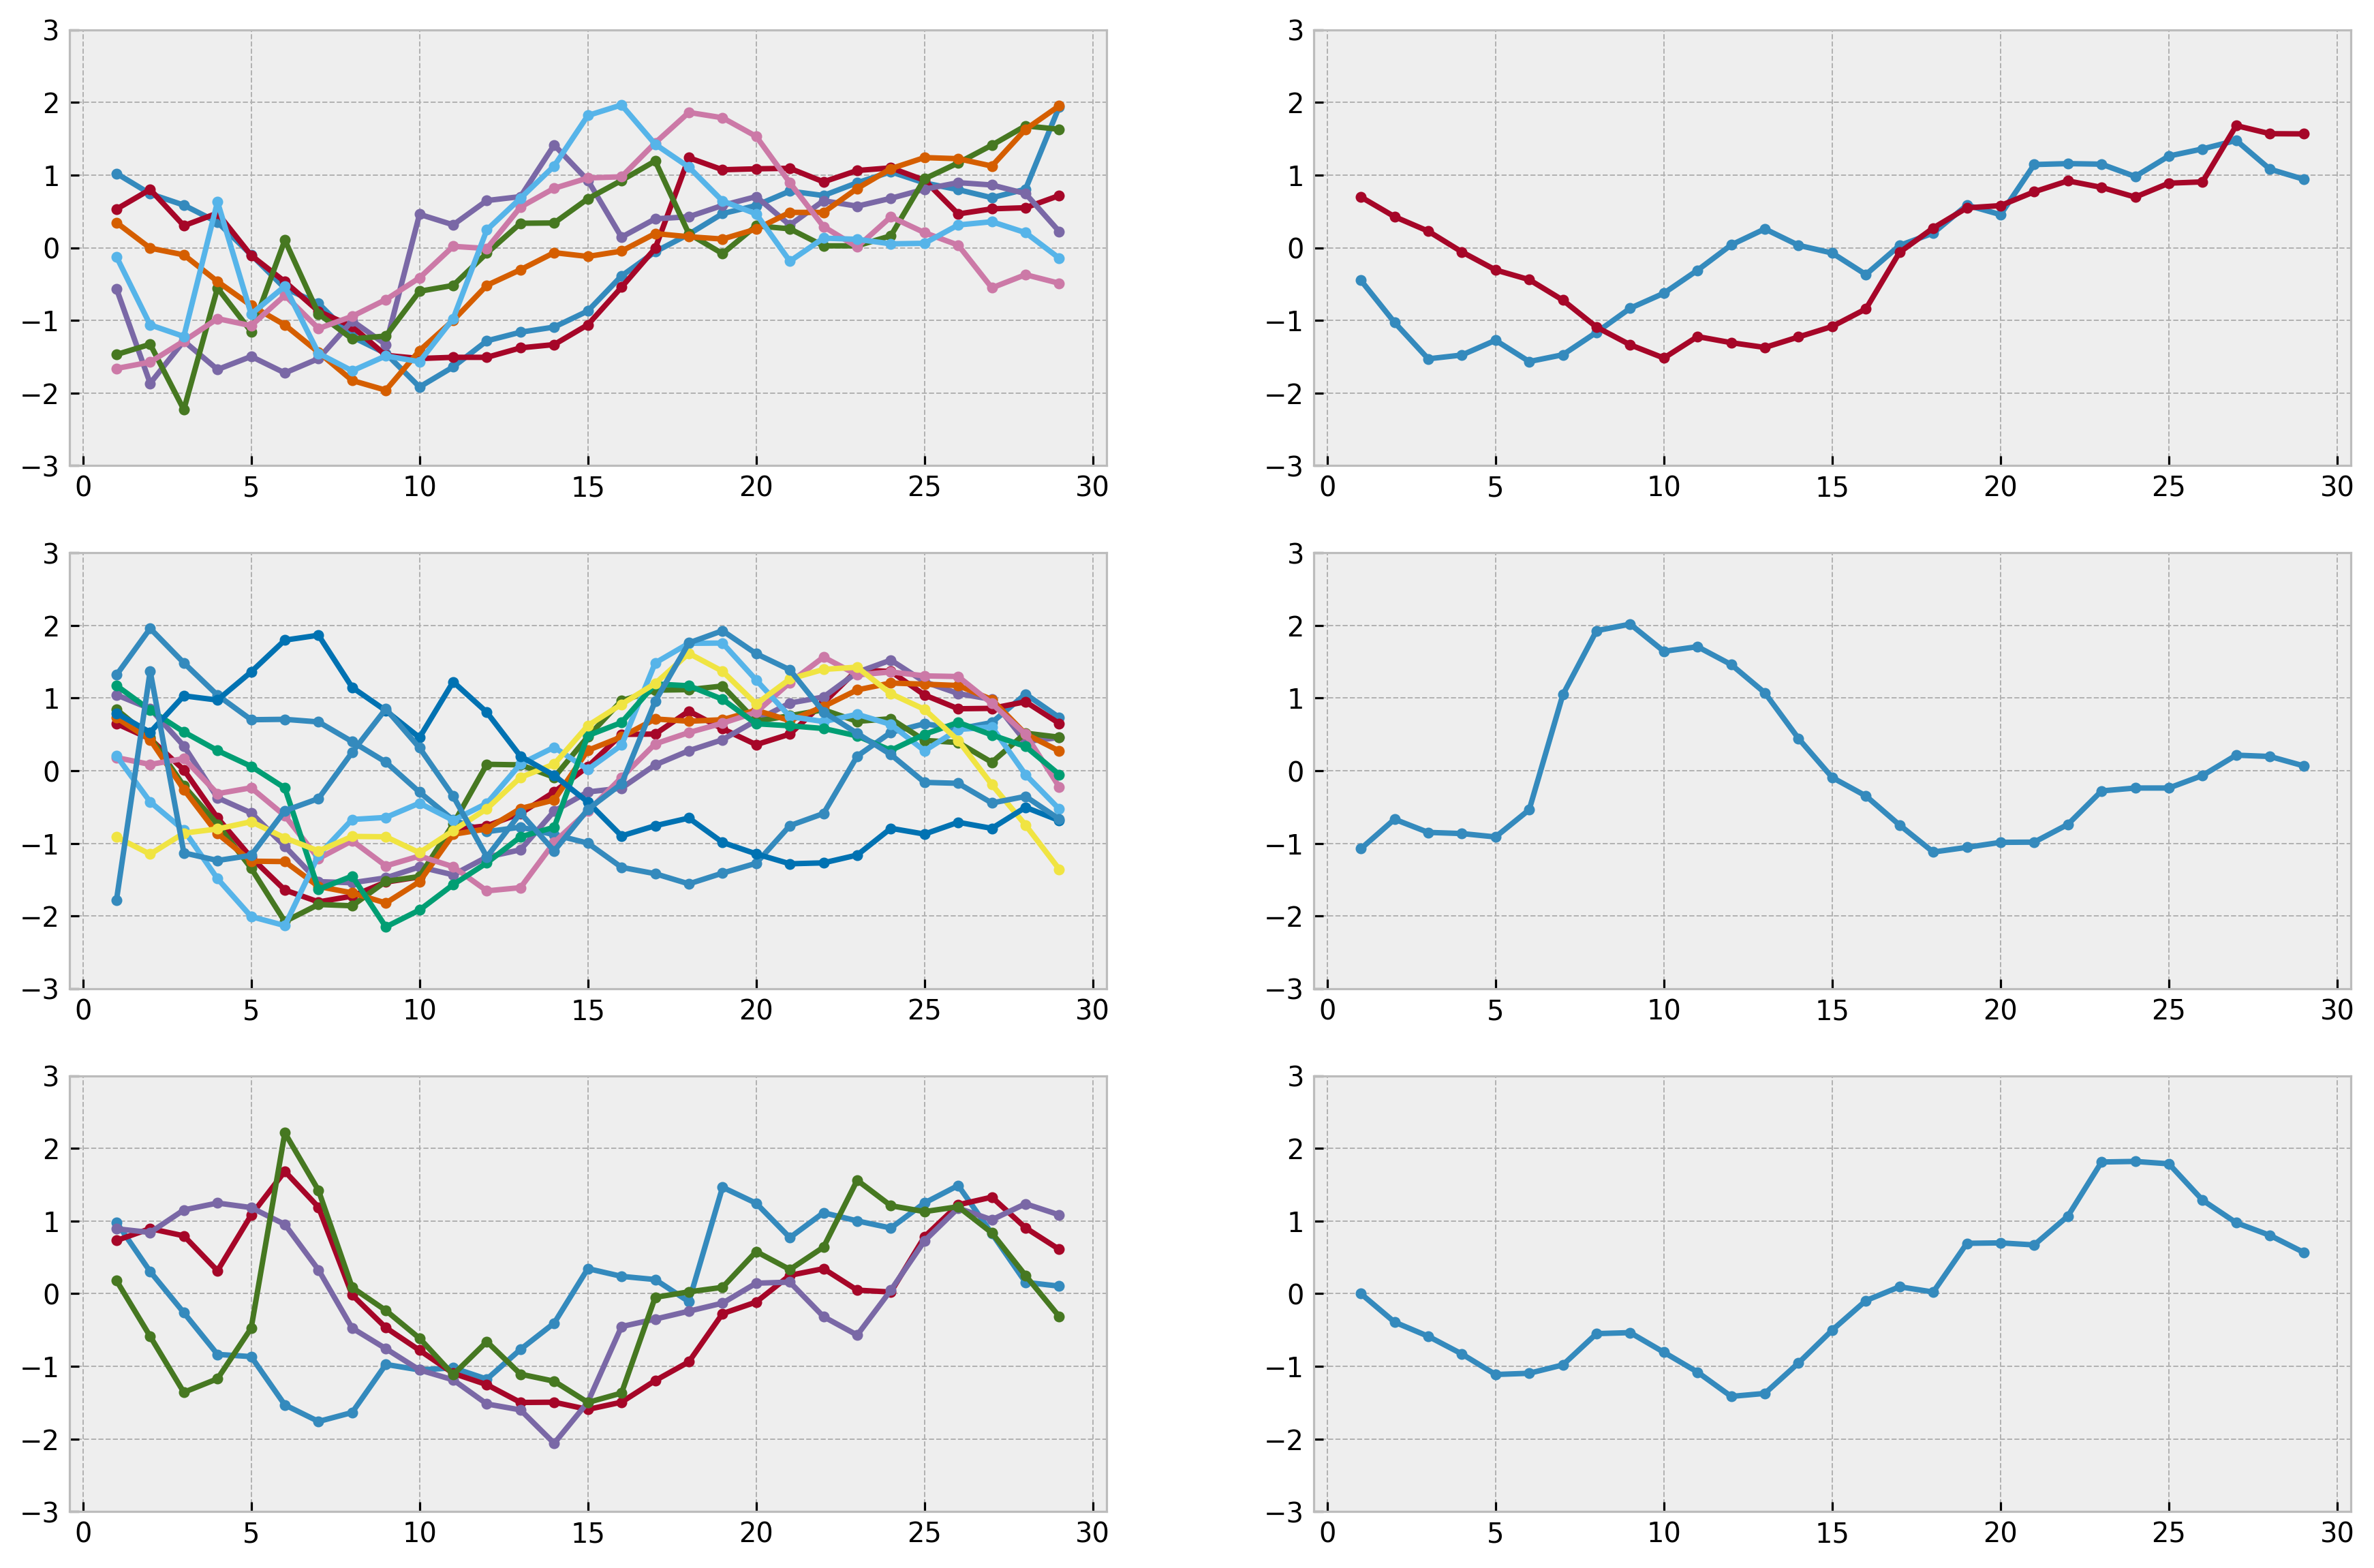

ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x115a9a048>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'
ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x115a9cea0>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/

In [36]:
timeSeries = hr_norm_nan.hr_norm.T
timeSeries
plot_clustered_ts(timeSeries,cluster_indeces["cluster"],anim = True, plot = True)

## hierarchical clustering on tsfresh features

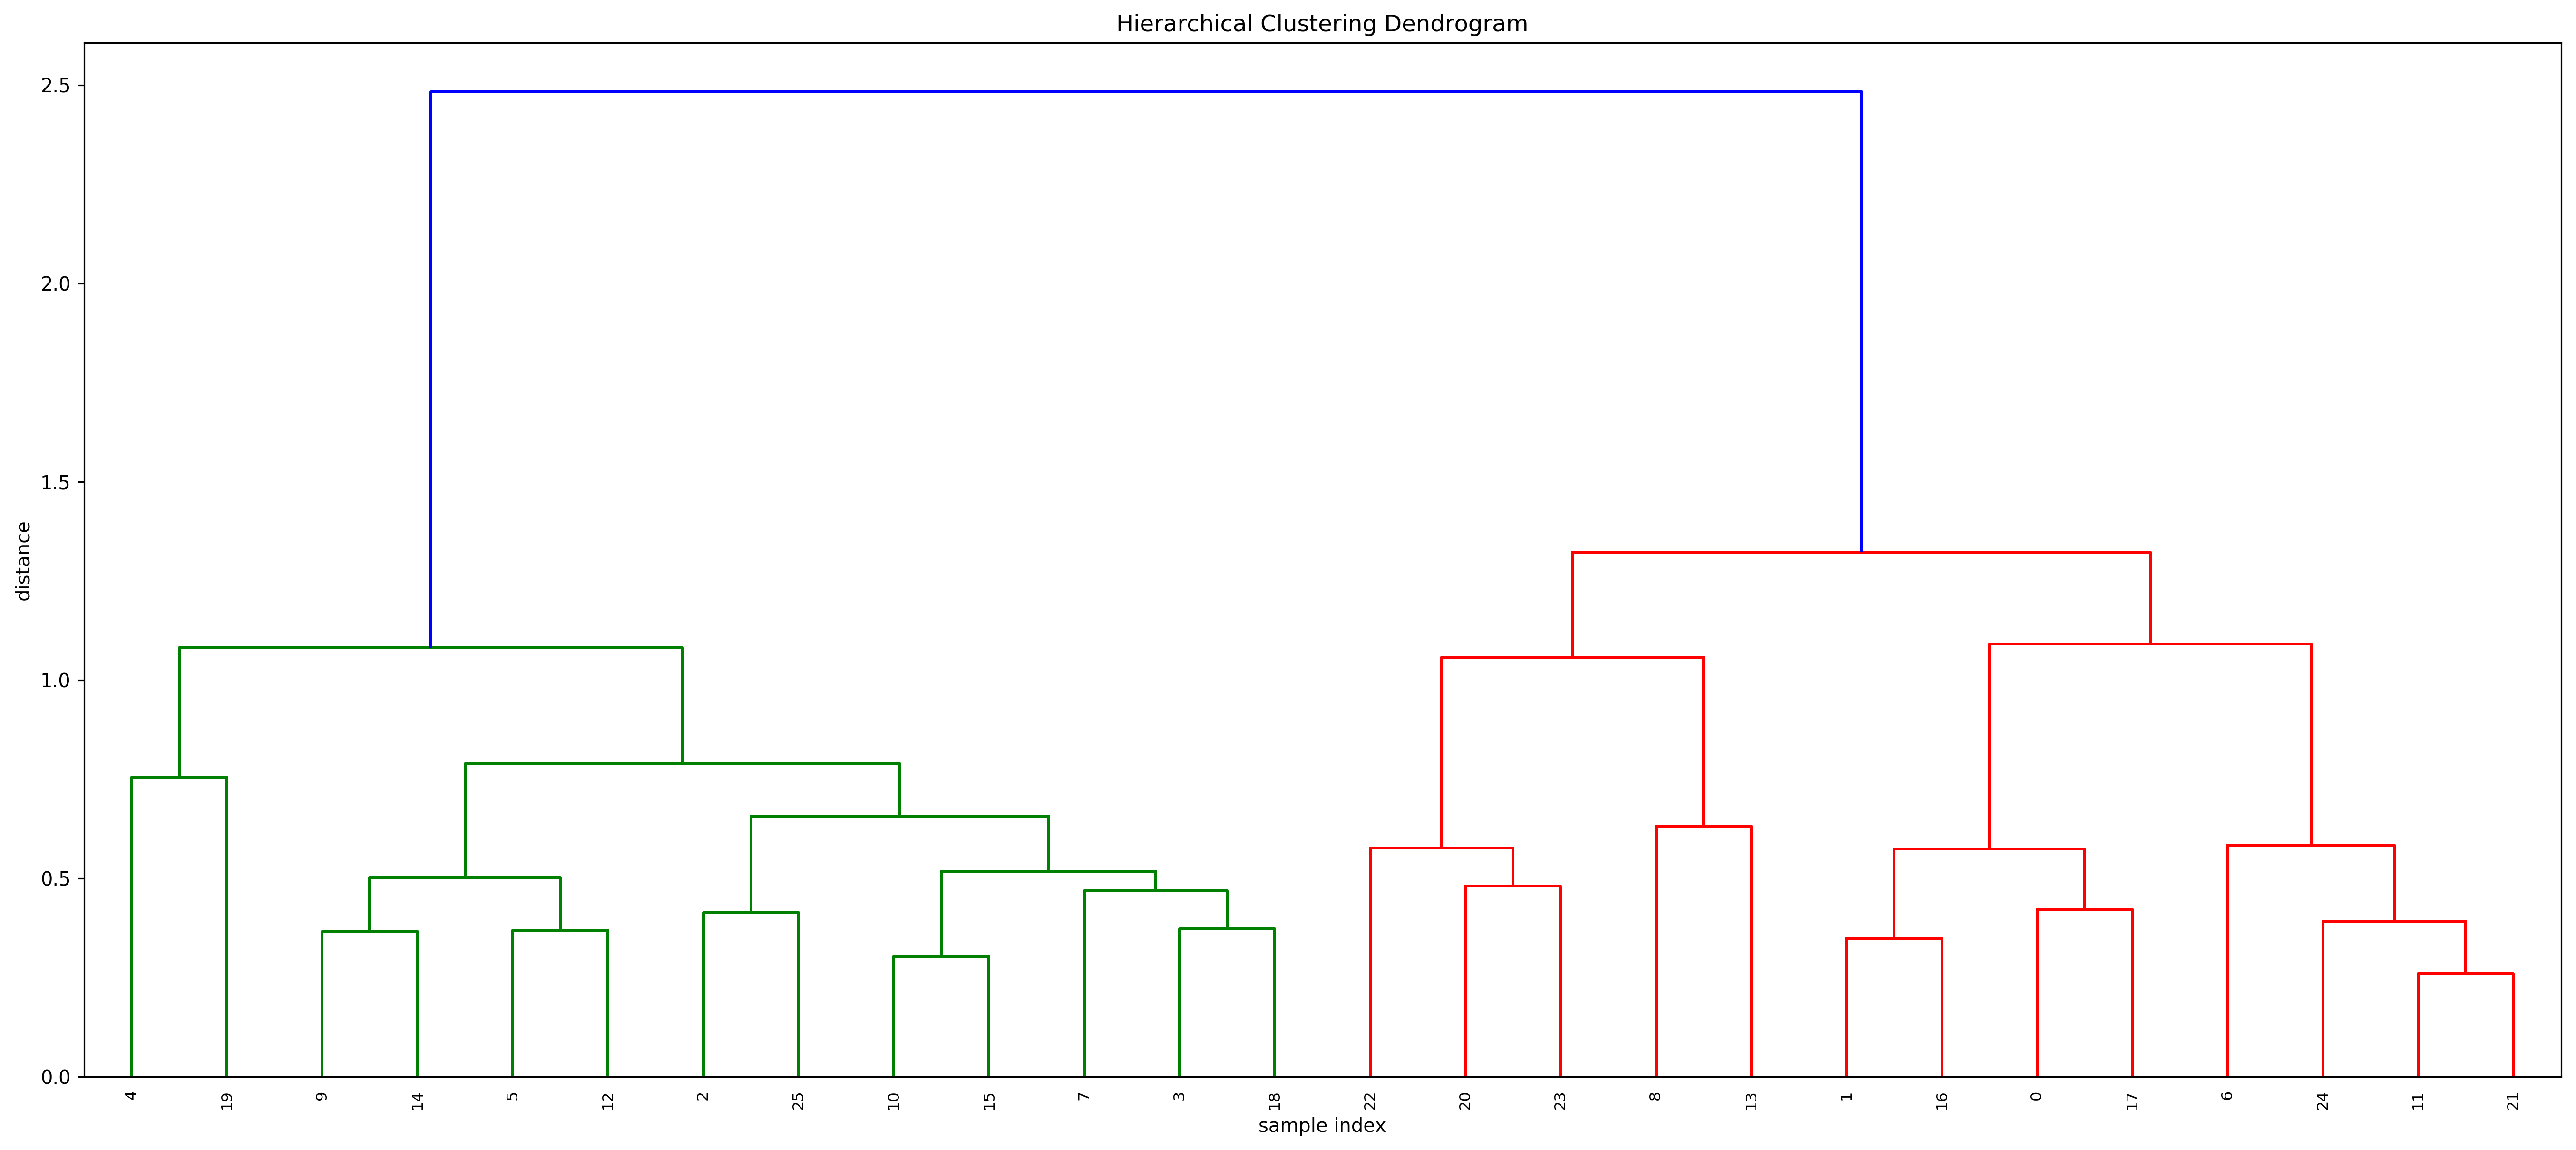

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# generate the linkage matrix
Z = linkage(cluster_data, 'complete',"braycurtis")

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

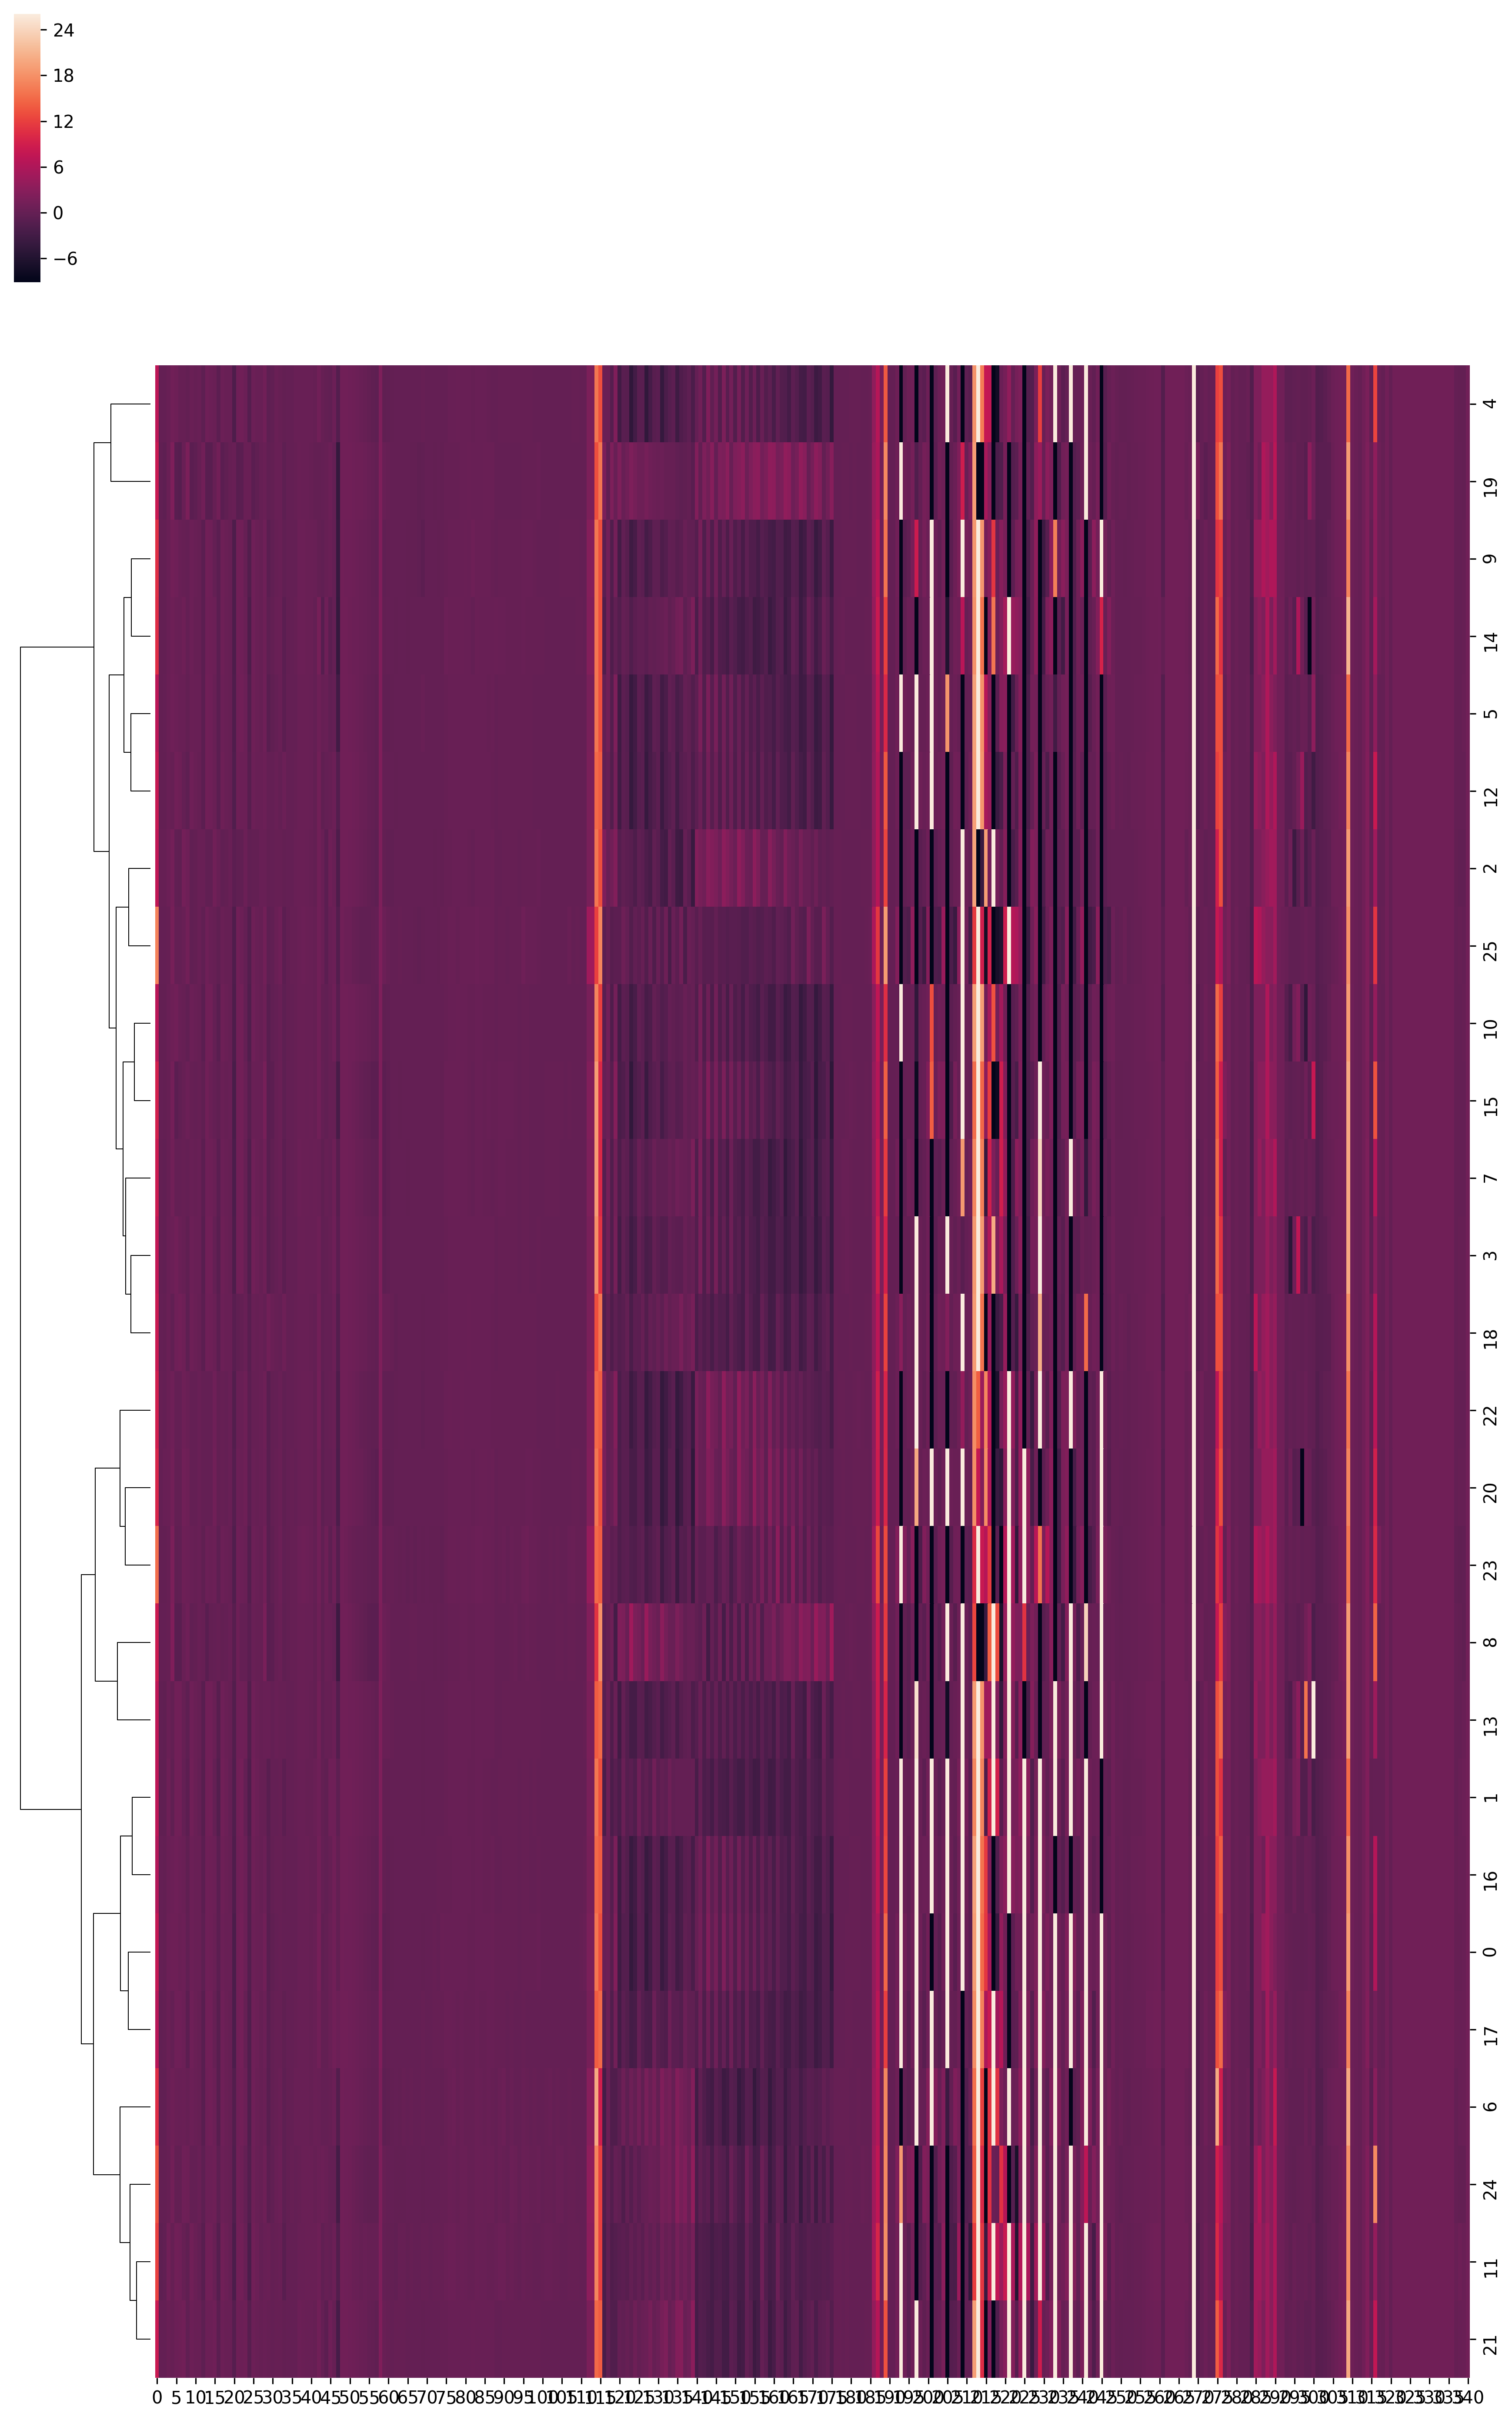

In [38]:
sns.clustermap(cluster_data, robust = True, col_cluster= False, method = "complete", metric = "braycurtis", figsize = (15,25))

In [39]:
k=6
clusters_hierarchical = fcluster(Z, k, criterion='maxclust')
clusters_hierarchical

array([5, 5, 2, 2, 1, 2, 6, 2, 4, 2, 2, 6, 2, 4, 2, 2, 5, 5, 2, 1, 3, 6, 3,
       3, 6, 2], dtype=int32)

In [40]:
cluster_indeces = pd.concat([pd.DataFrame(clusters_hierarchical), pd.DataFrame(features_finite2.index)], axis = 1)
cluster_indeces["cluster"] = cluster_indeces[0]
cluster_indeces = cluster_indeces.drop(0, axis = 1).set_index("id")
cluster_indeces.head()

cluster
id         
22        5
24        5
27        2
52        2
57        1

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


id
22     5
24     5
27     2
52     2
57     1
81     2
126    6
175    2
210    4
211    2
214    2
230    6
236    2
253    4
277    2
482    2
490    5
542    5
625    2
633    1
651    3
692    6
719    3
725    3
780    6
782    2
Name: cluster, dtype: int32

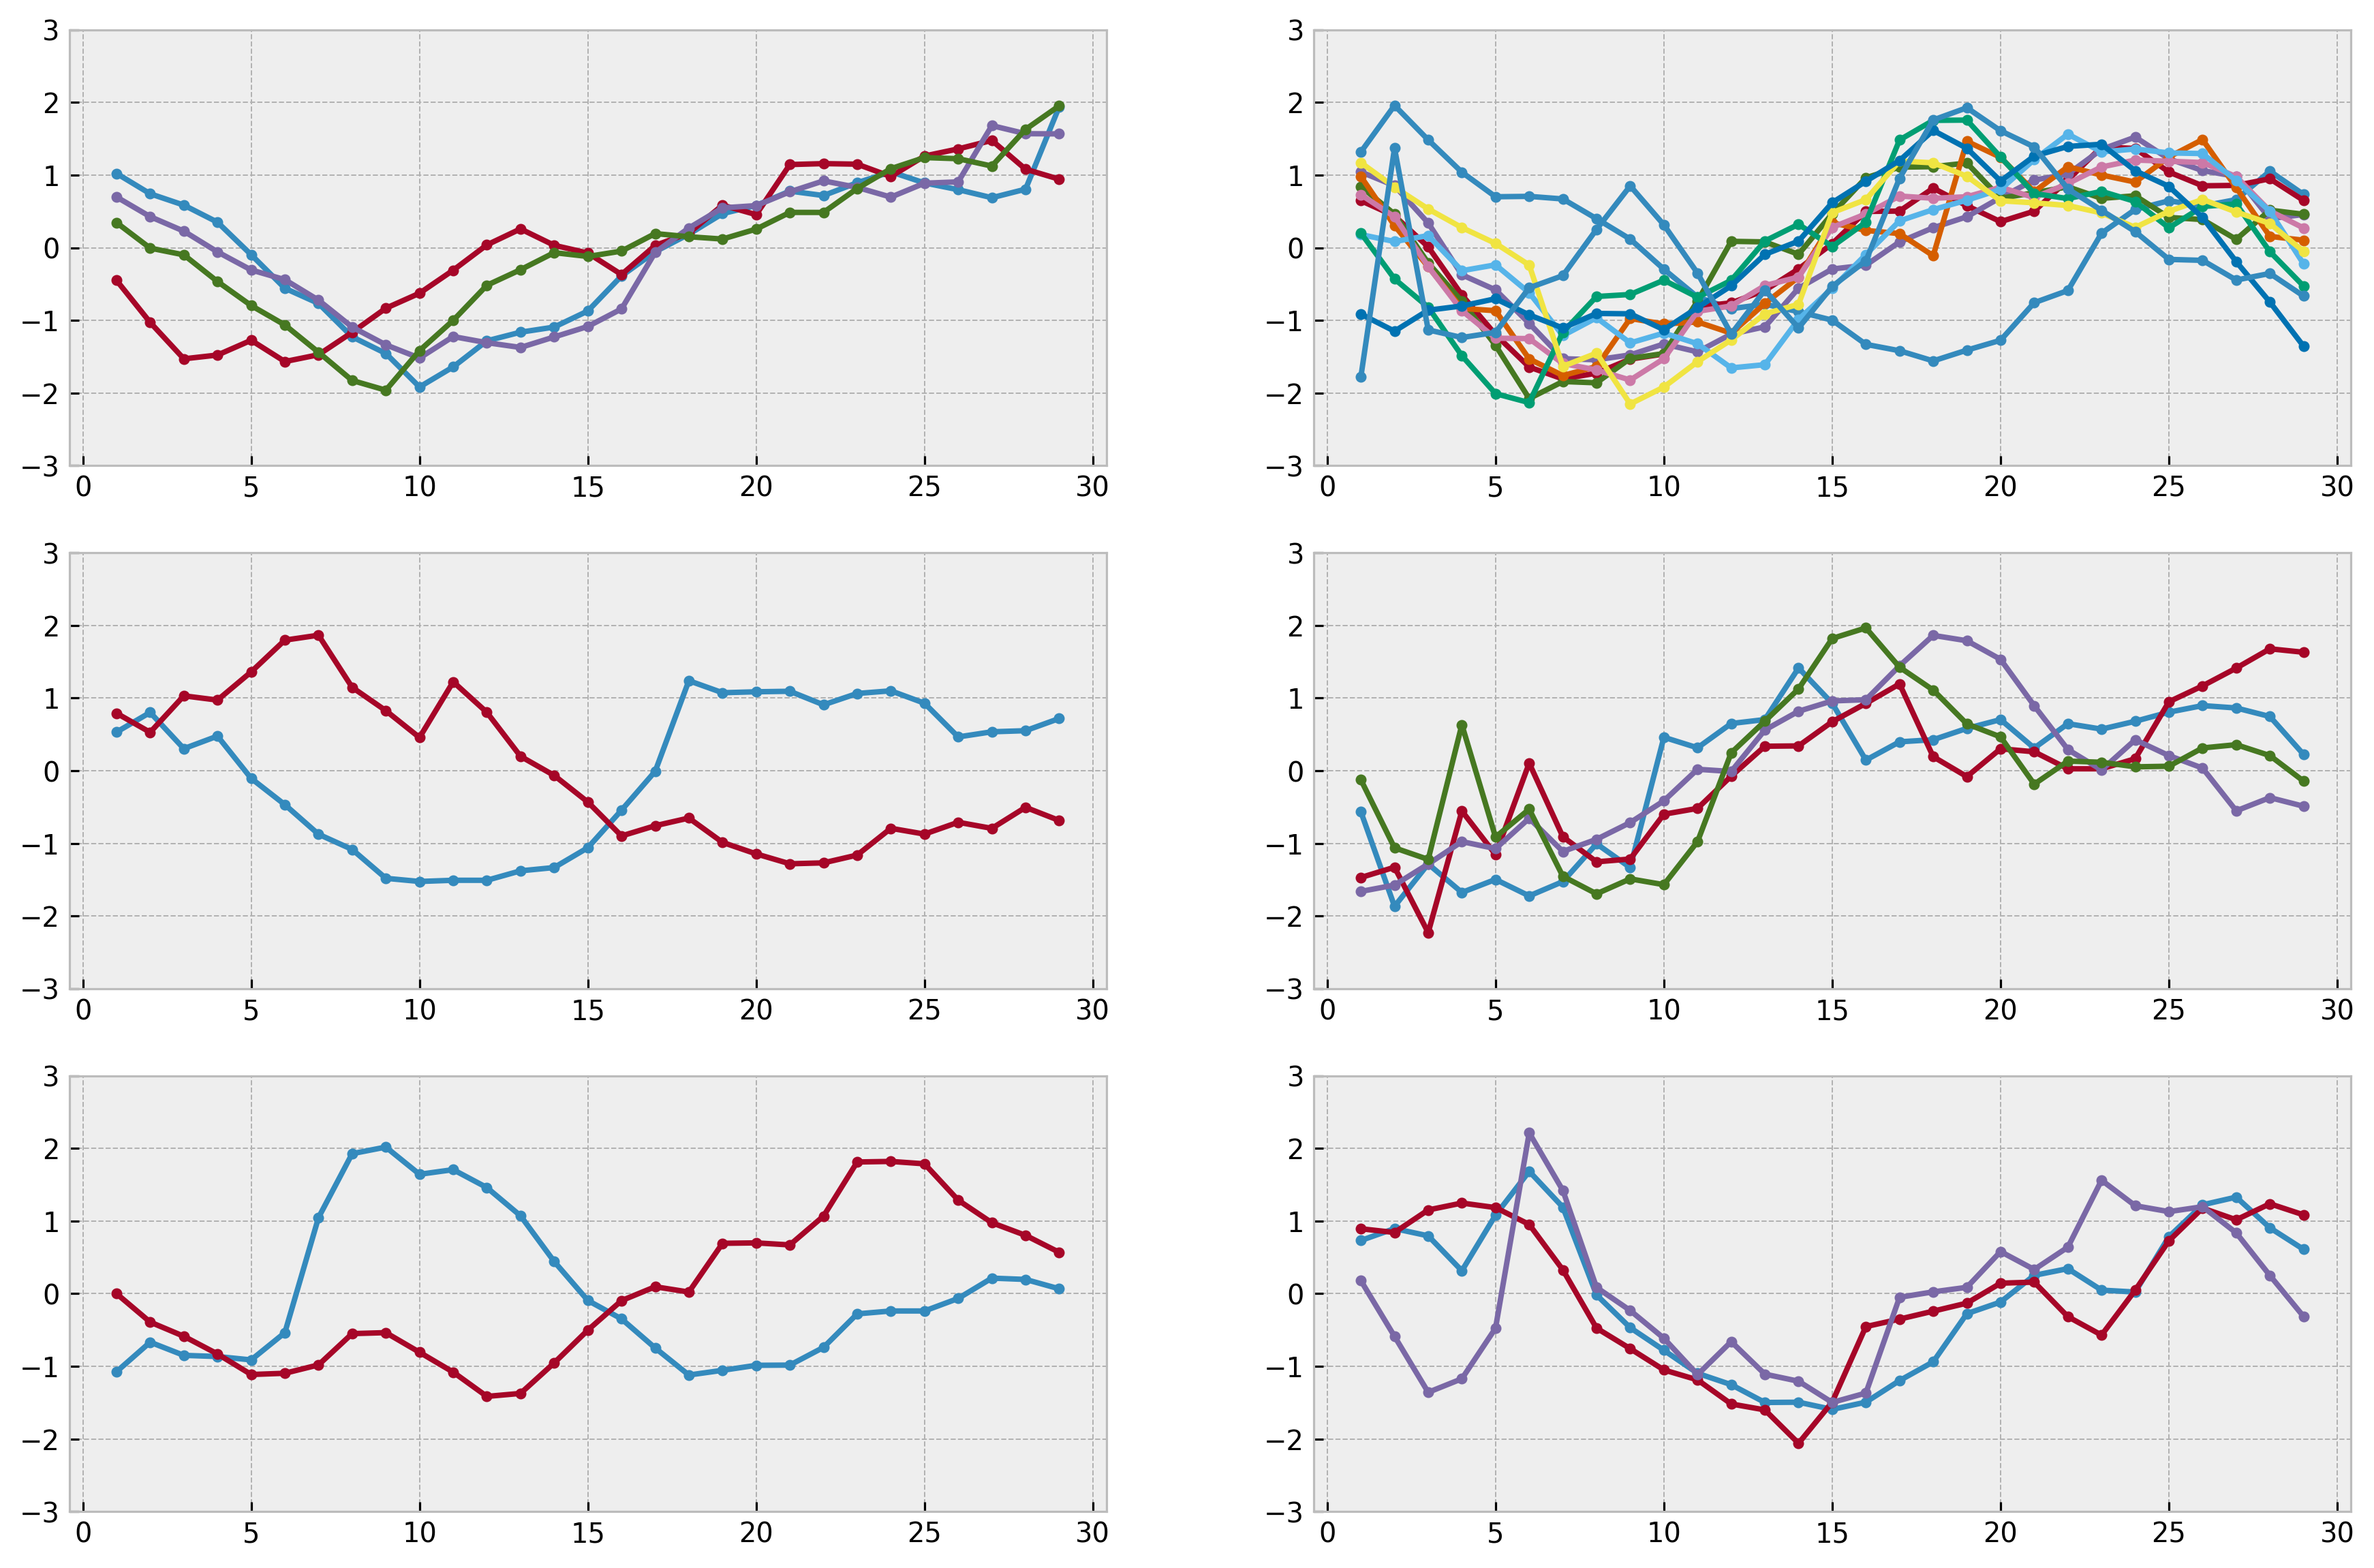

ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x115a9cea0>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'
ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x115b20400>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/

In [41]:
plot_clustered_ts(timeSeries,cluster_indeces["cluster"],anim = True, plot = True)

# PCA

In [42]:
# PCA 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [63]:
reduced_data = PCA(n_components=10).fit_transform(features_finite2)
len(reduced_data)

26

### k-means clustering of 5 componant PCA

[[ -7.09711281e+01  -1.81201595e+02   1.18809092e+01   2.77062612e+01
   -6.94517931e+01   2.82630964e+01  -4.24921014e+00  -1.47767775e+01
   -7.89438562e+00  -1.06214221e+01]
 [  1.27060129e+03  -9.34696389e+00   5.09201009e+01  -1.12590218e+01
   -4.34111674e+01   2.92365561e+01  -9.16082895e-01   2.20257129e+01
   -5.46032753e+00  -1.08244535e+01]
 [ -6.25645269e+01   2.04242068e+02   1.83878556e+02   7.59254184e+01
    6.49927724e+01   2.03644275e+01   6.85915744e+01  -8.96549653e+00
   -2.03293992e+01   3.00471010e+01]
 [ -4.03435745e+01   6.30865581e+00  -2.17041785e+01  -9.68706896e+01
    3.23398050e+01  -4.68242042e+01  -6.29644858e+00   3.58387390e+01
    4.47181046e+01   6.25772240e+00]
 [  5.54515466e+01  -1.46344848e+02  -1.65179167e+02   2.66592963e+02
    2.91970404e+02  -1.63272904e+02  -6.61138833e-01  -4.02552097e+01
   -6.44215082e+01  -4.46101498e+01]
 [ -3.81019917e+01   3.06356215e+02  -1.84849971e+02  -1.11421496e+01
   -4.73942092e+01   5.76014679e+01  -6.13915

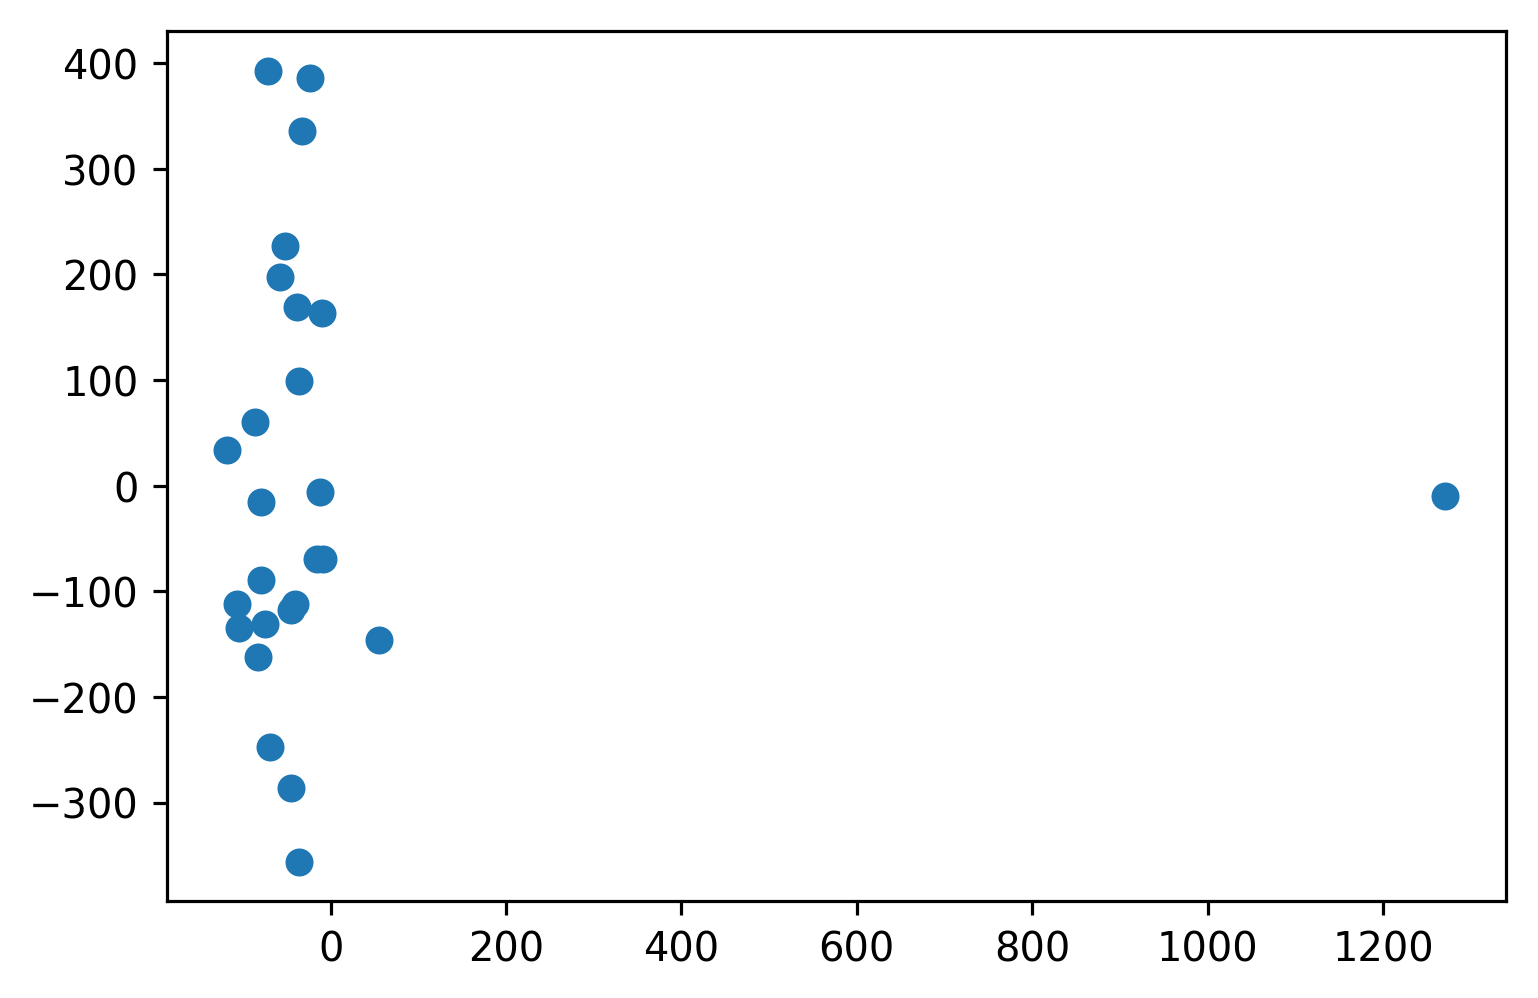

In [64]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit(reduced_data)

plt.scatter(reduced_data[:,0],reduced_data[:,1])

centroids = kmeans.cluster_centers_
print(centroids)
labels = kmeans.labels_
print(labels)

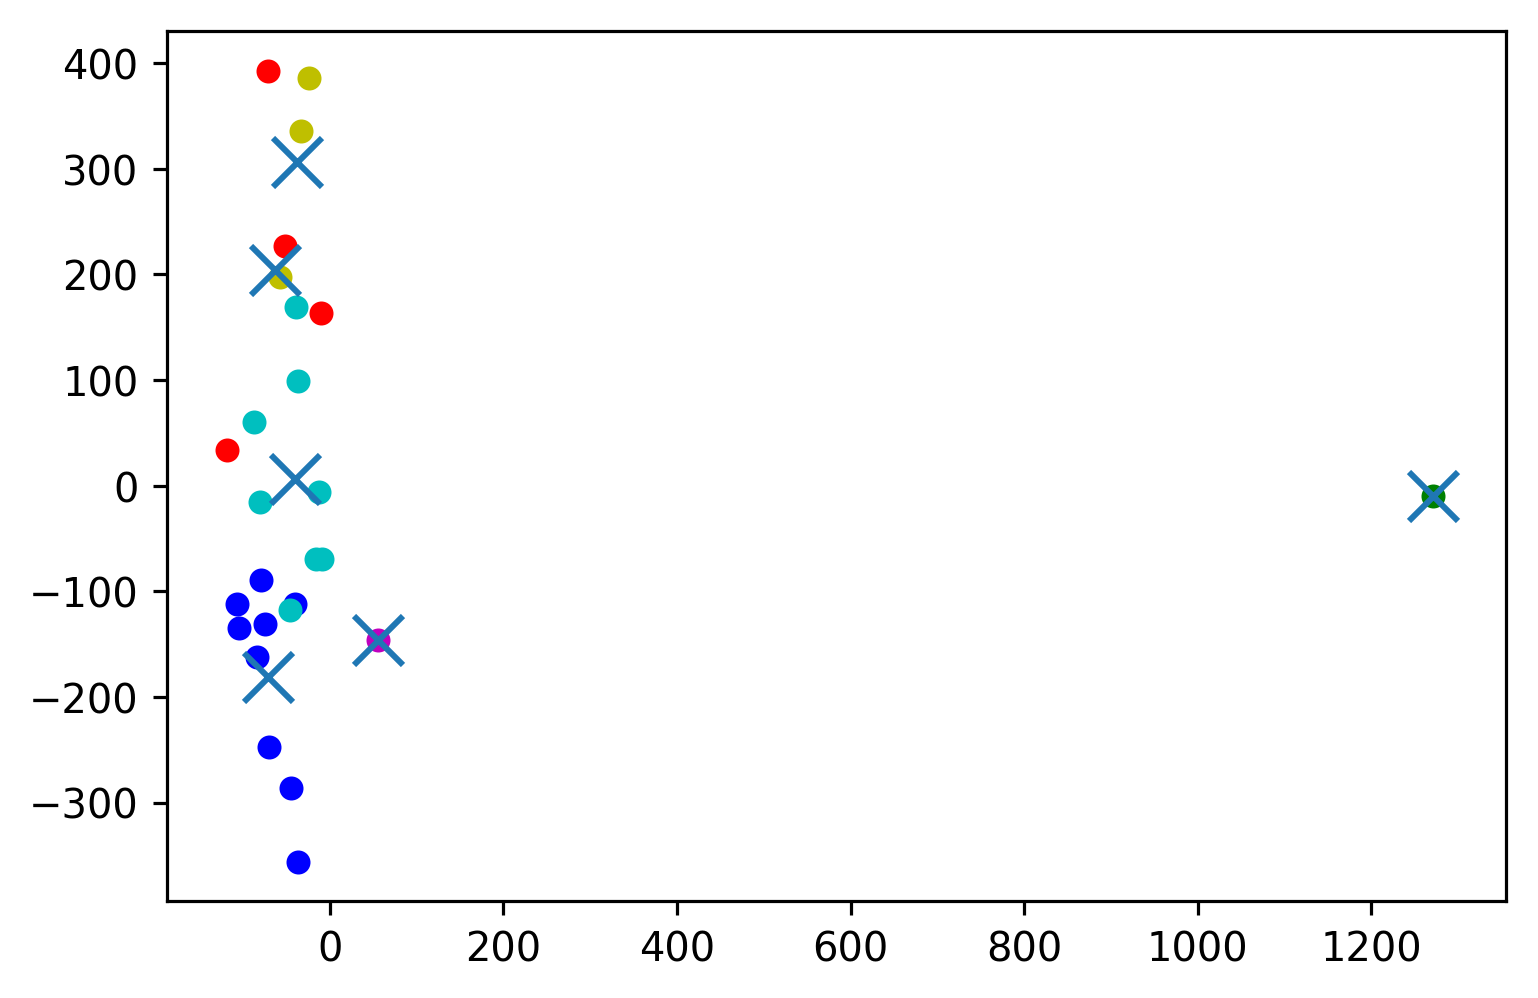

In [65]:
colors = ['b.', 'g.', 'r.', 'c.', 'm.', 'y.', 'k.', 'w.']
X = reduced_data
for i in range(len(X)):
    
    #print("coordinate:",X[i][0], "label:", labels[i])
    #print("X", X[i][0])
    #print("label", colors[labels[i]])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

In [66]:
cluster_indeces = pd.concat([pd.DataFrame(labels), pd.DataFrame(features_finite2.index)], axis = 1)
cluster_indeces["cluster"] = cluster_indeces[0]
cluster_indeces = cluster_indeces.drop(0, axis = 1).set_index("id")
cluster_indeces.head()

cluster
id         
22        2
24        2
27        0
52        0
57        3

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


id
22     2
24     2
27     0
52     0
57     3
81     3
126    3
175    0
210    4
211    3
214    0
230    5
236    0
253    1
277    3
482    0
490    2
542    2
625    0
633    0
651    3
692    5
719    3
725    3
780    5
782    0
Name: cluster, dtype: int32

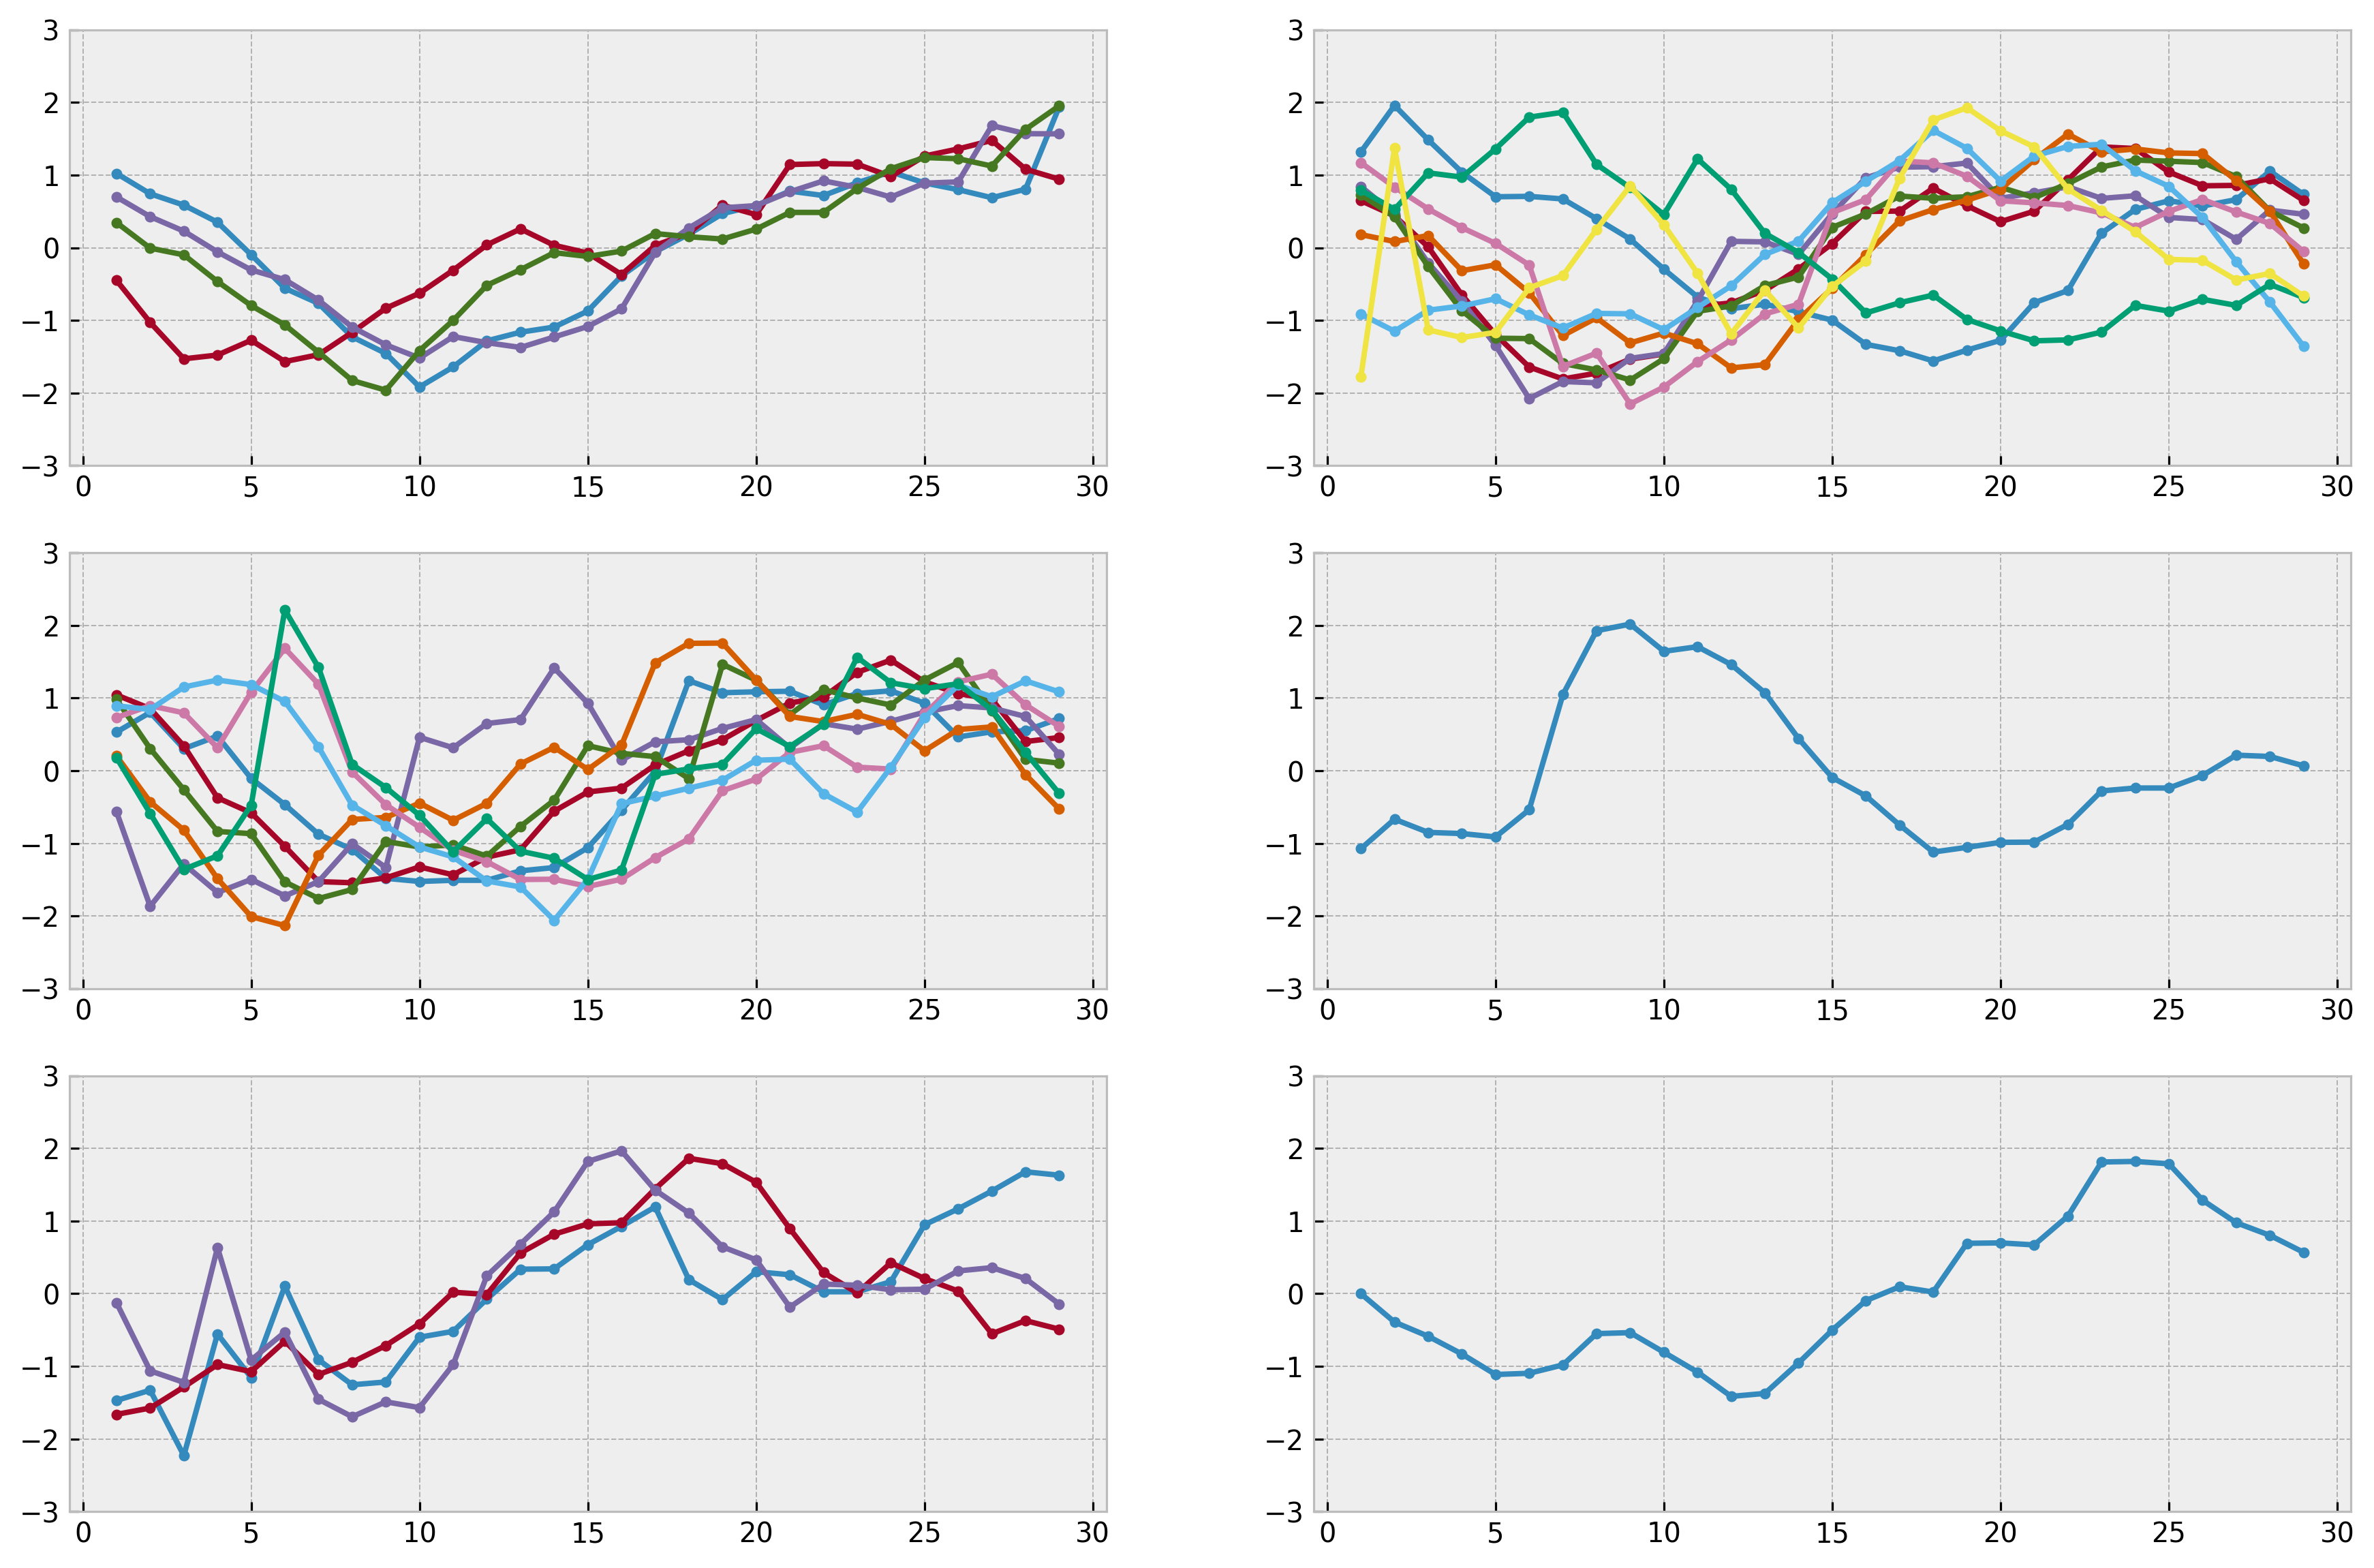

ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x115b20488>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'
ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x11bd38d08>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/

In [67]:
timeSeries = hr_norm_nan.hr_norm.T
timeSeries
plot_clustered_ts(timeSeries,cluster_indeces["cluster"],anim = True, plot = True)

## hierarchical clustering of 5 component PCA

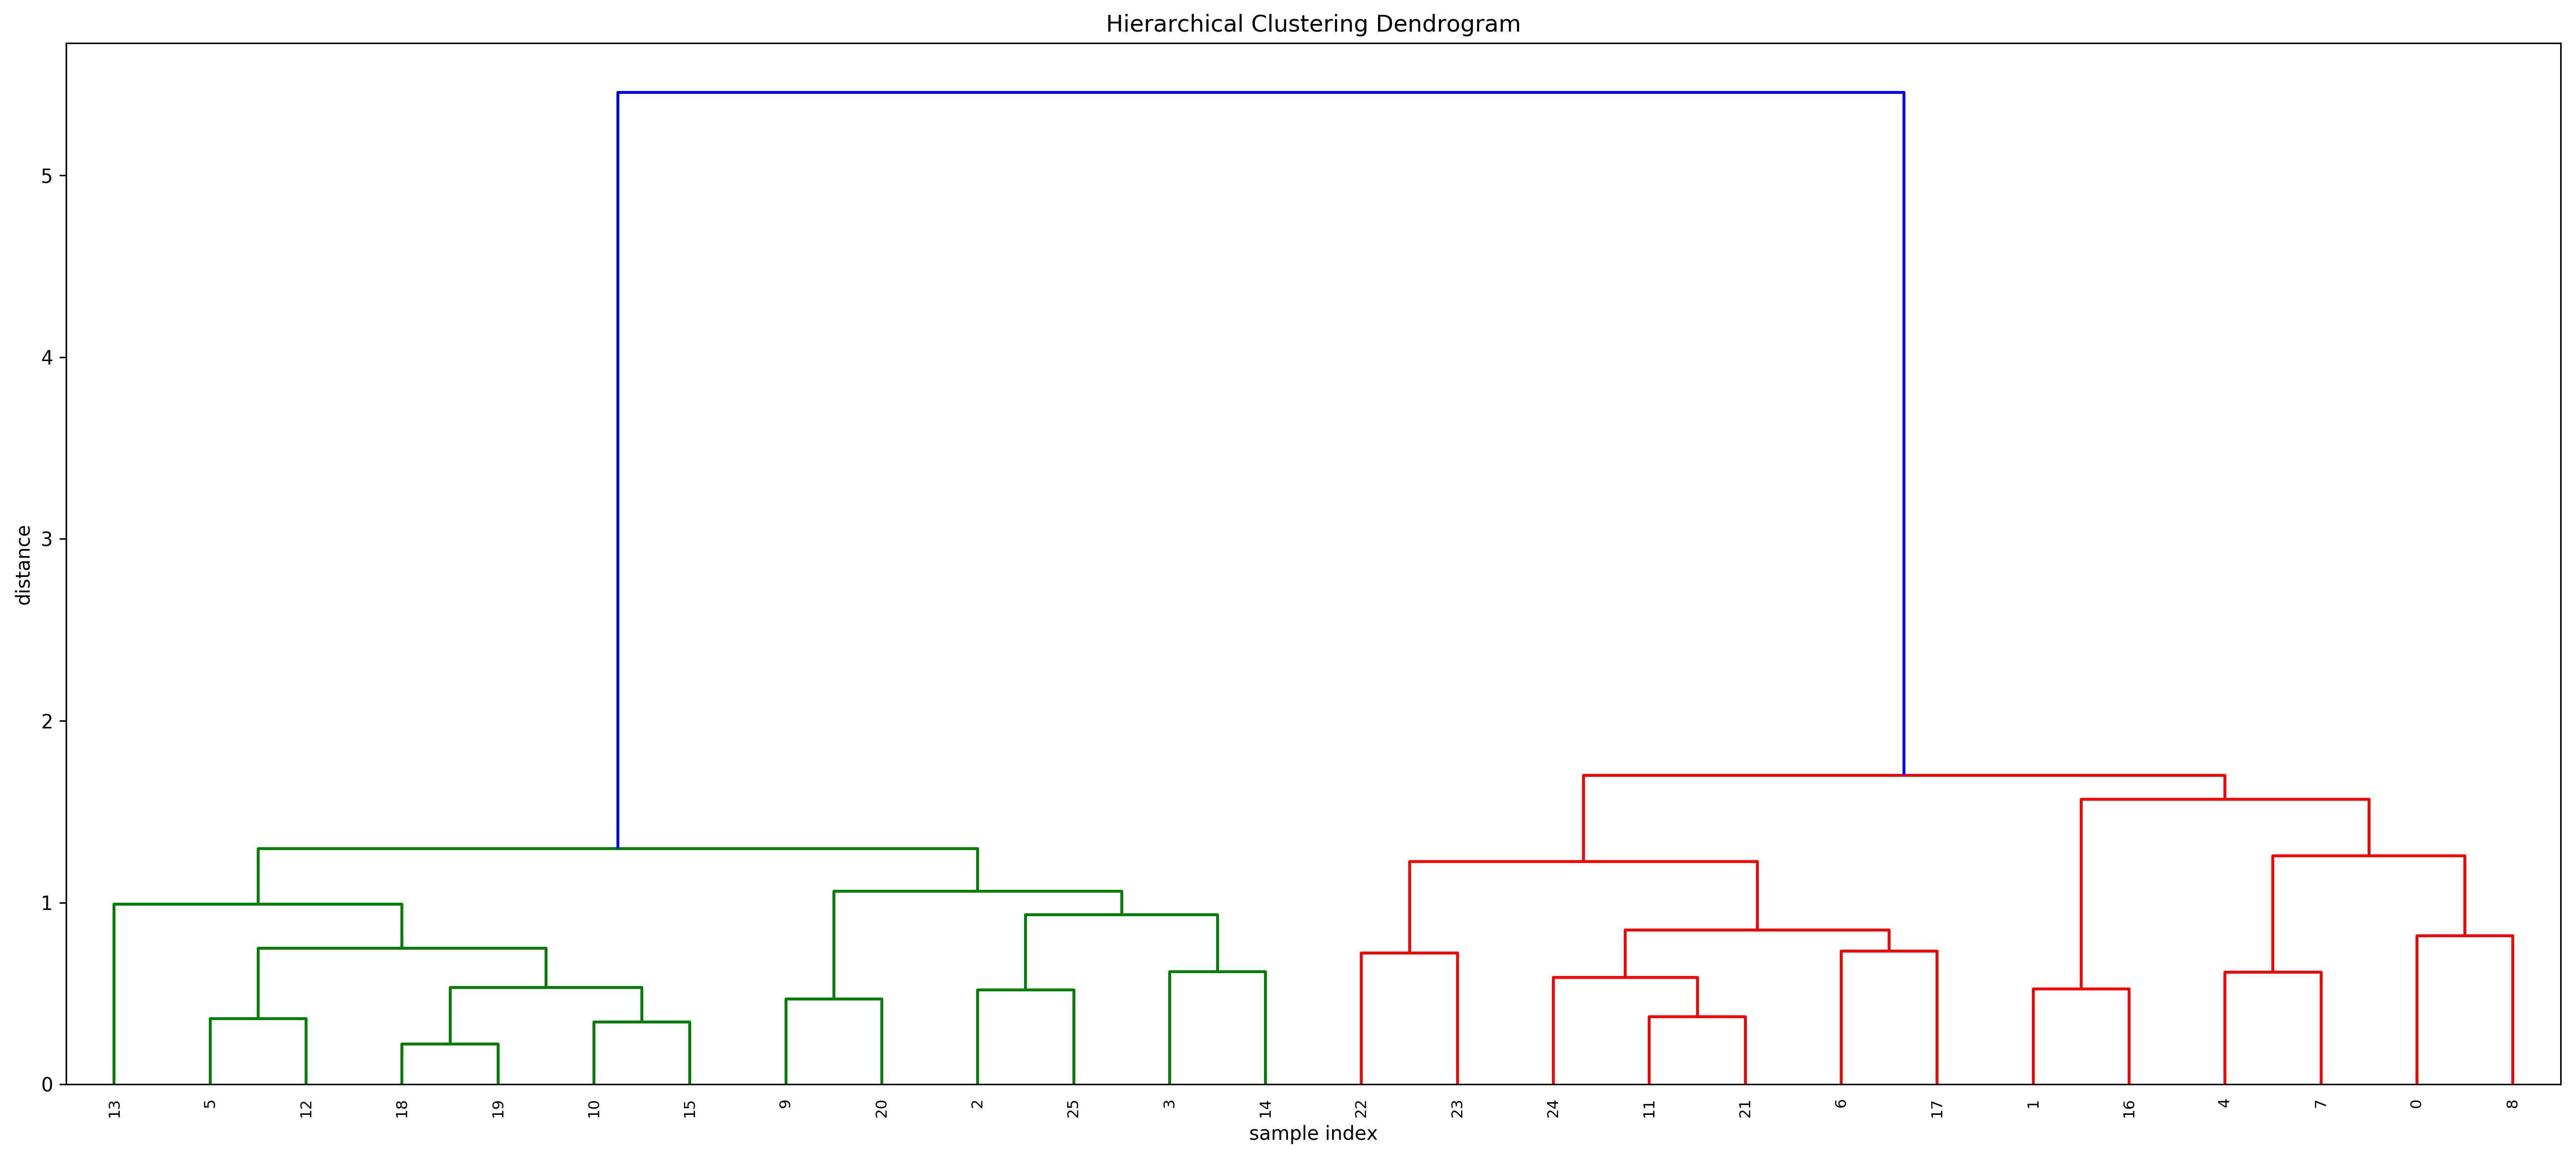

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np

# generate the linkage matrix
Z = linkage(reduced_data, 'complete',"braycurtis")

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

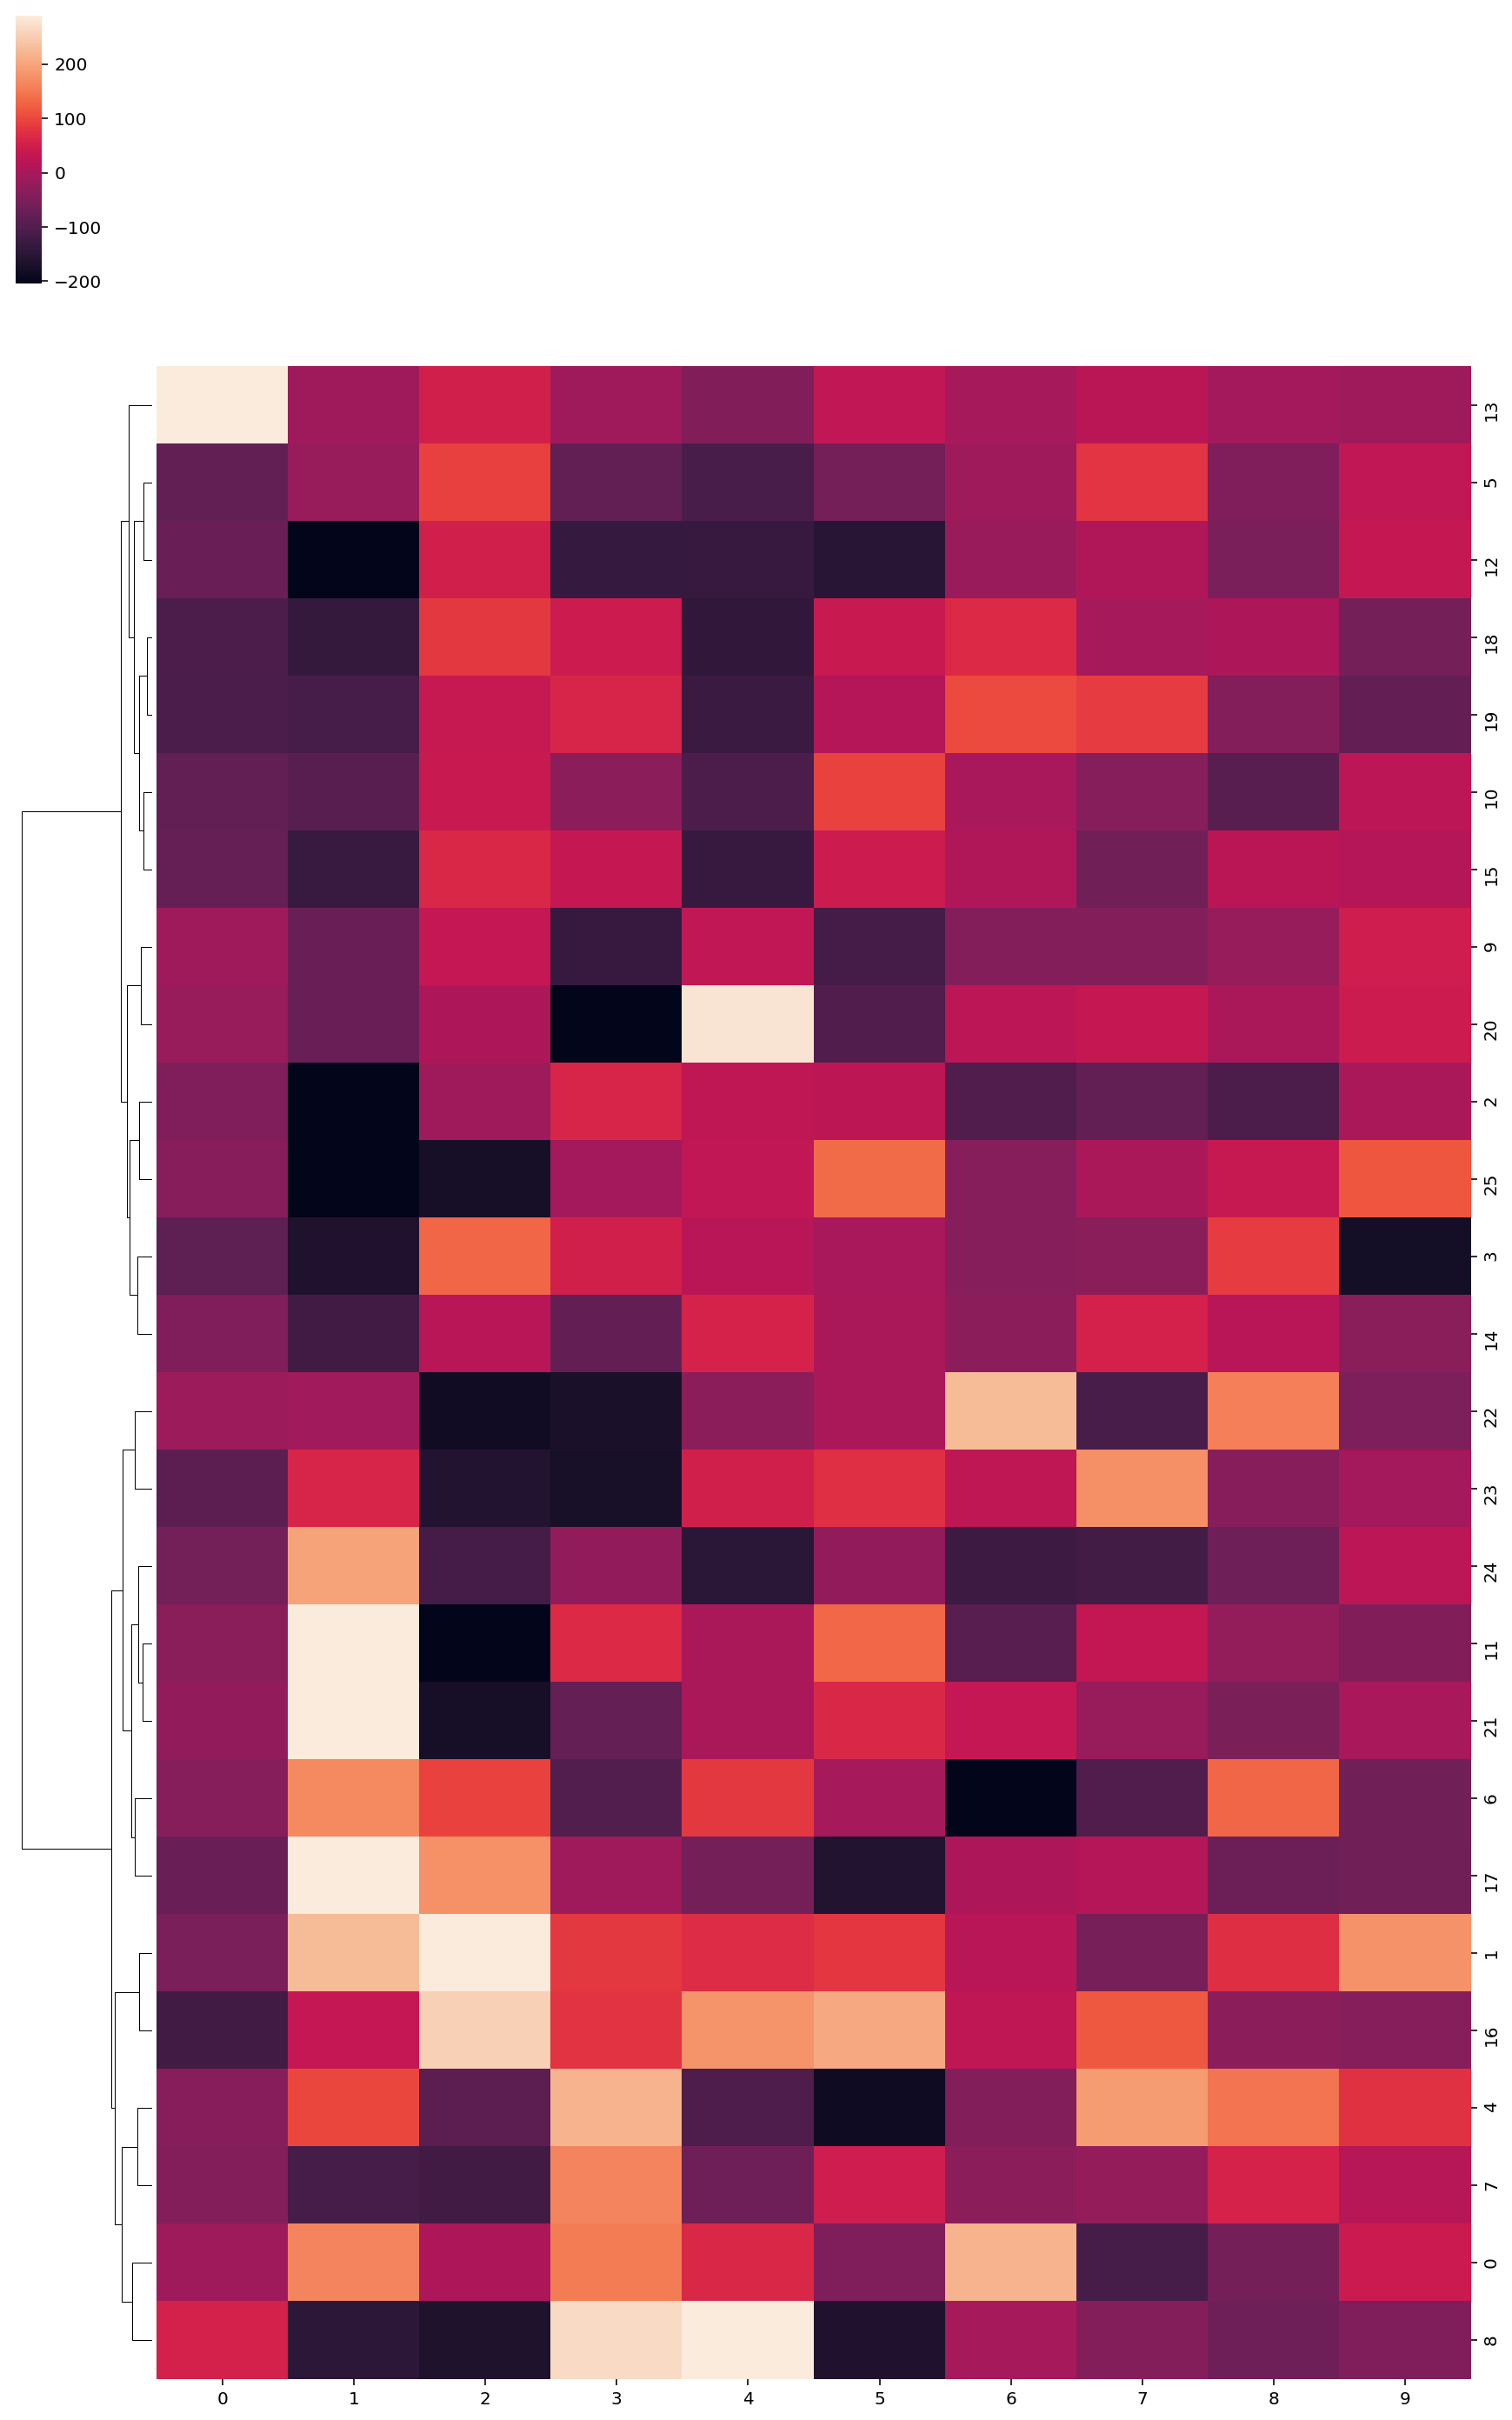

In [69]:
%matplotlib inline
sns.clustermap(reduced_data, robust = True, col_cluster= False, method = "complete", metric = "braycurtis", figsize = (15,25))

In [70]:
k=6
clusters_hierarchical = fcluster(Z, k, criterion='maxclust')

In [71]:
clusters_hierarchical

array([6, 4, 2, 2, 5, 1, 3, 5, 6, 2, 1, 3, 1, 1, 2, 1, 4, 3, 1, 1, 2, 3, 3,
       3, 3, 2], dtype=int32)

In [72]:
cluster_indeces = pd.concat([pd.DataFrame(clusters_hierarchical), pd.DataFrame(features_finite2.index)], axis = 1)
cluster_indeces["cluster"] = cluster_indeces[0]
cluster_indeces = cluster_indeces.drop(0, axis = 1).set_index("id")
cluster_indeces.head()

cluster
id         
22        6
24        4
27        2
52        2
57        5

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


id
22     6
24     4
27     2
52     2
57     5
81     1
126    3
175    5
210    6
211    2
214    1
230    3
236    1
253    1
277    2
482    1
490    4
542    3
625    1
633    1
651    2
692    3
719    3
725    3
780    3
782    2
Name: cluster, dtype: int32

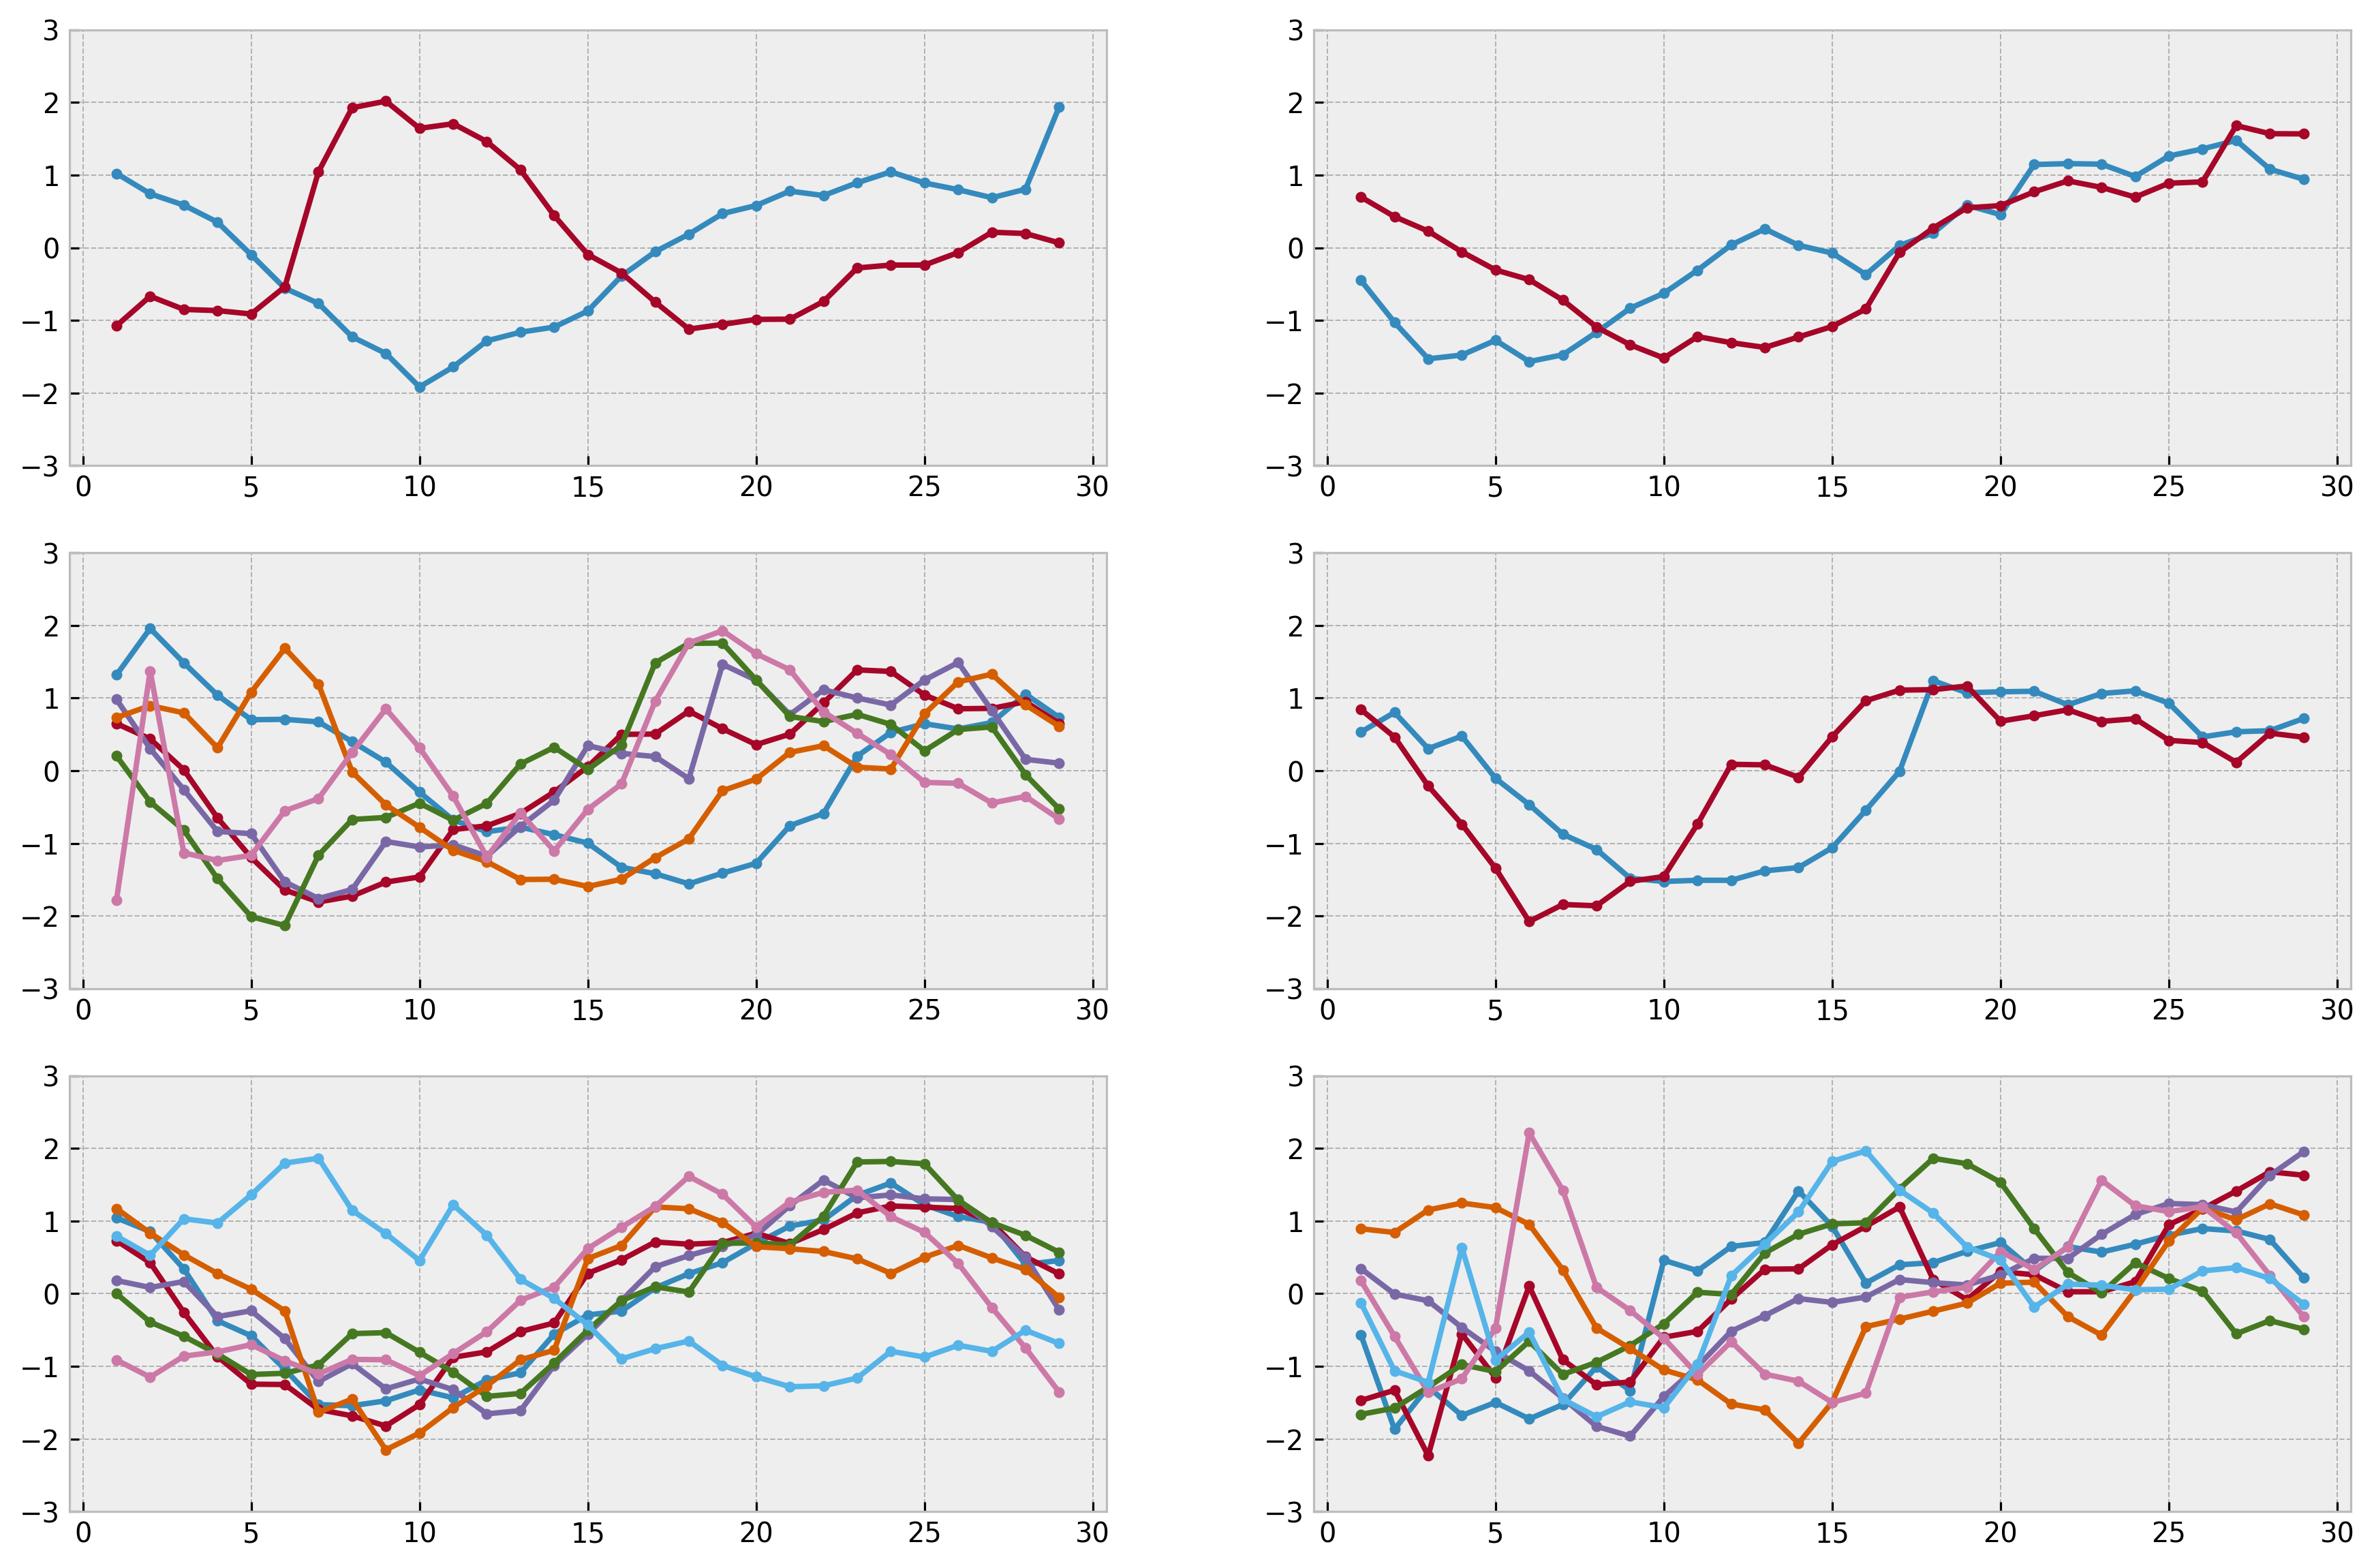

ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x11eacc158>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'


In [73]:
timeSeries = hr_norm_nan.hr_norm.T
timeSeries
plot_clustered_ts(timeSeries,cluster_indeces["cluster"],anim = True, plot = True)